In [5]:
import struct
import math
from pathlib import Path

import numpy as np
from numpy import linalg as LA

from multiprocessing import Pool

import matplotlib.pyplot as plt

## 1. Gradient analysis

In [7]:
!ls -l /checkpoint/qiantong/ls_200M/100h/109/1.hyp

-rw-rw-r-- 1 qiantong qiantong 1196929704 Feb 27 19:09 /checkpoint/qiantong/ls_200M/100h/109/1.hyp


In [19]:
data = Path('/checkpoint/qiantong/ls_200M/100h/109/1.hyp').read_bytes()
n_element = len(data) // 4
print(n_element)
floats = struct.unpack('f' * n_element, data)
print(floats[:4])
print(floats[-4:])

299232426
(0.5681254863739014, 1.3127676248550415, -0.06447029858827591, -0.06389478594064713)
(0.0027960685547441244, 0.0013880509650334716, 0.0021991871763020754, -1.9327764511108398)


In [21]:
np_floats = np.array(floats)
print(np_floats)

[ 5.68125486e-01  1.31276762e+00 -6.44702986e-02 ...  1.38805097e-03
  2.19918718e-03 -1.93277645e+00]


In [22]:
print(LA.norm(np_floats))

465.81794349757877


In [20]:
bins_dict = {
46 : [1, 109, 8363, 17751467, 208489727, 56237161, 9217817, 1596883, 253373, 28601, 3409, 640, 68, 4, 1, 5644802],
1 : [0, 38, 4190, 21596070, 122833690, 86766410, 39632441, 8122478, 2020879, 257077, 26159, 2657, 259, 24, 4, 17970050],
26 : [3, 185, 28352, 14589686, 186898801, 80434979, 11598093, 1626852, 222687, 39074, 5243, 614, 68, 9, 0, 3787780],
16 : [1, 551, 12015, 8850019, 170735014, 98521197, 14957350, 2027983, 269251, 38336, 4631, 586, 58, 6, 0, 3815428],
11 : [3, 491, 26506, 11524182, 163332475, 102010491, 15909778, 2413121, 297314, 55034, 11775, 1474, 217, 26, 1, 3649538],
31 : [1, 568, 5770, 6820131, 178952347, 94153775, 13534986, 1803722, 252522, 39410, 5085, 677, 64, 5, 1, 3663362],
6 : [1, 668, 11044, 2210901, 14238680, 91140398, 133192298, 41763304, 7491123, 2050388, 258721, 28738, 2946, 294, 35, 6842887],
36 : [1, 534, 8388, 9983593, 190786459, 80888338, 11564091, 1474026, 259628, 42152, 7120, 1416, 325, 30, 3, 4216322],
41 : [1, 196, 16860, 16693115, 204037017, 63297611, 9371563, 1250256, 217942, 30651, 3682, 389, 50, 4, 1, 4313088],
21 : [1, 574, 5293, 4226858, 137108068, 129185655, 21446430, 3070135, 366461, 55116, 6985, 652, 66, 1, 0, 3760131],
47 : [1, 493, 7756, 10917169, 201047961, 69576140, 10683294, 1661210, 306146, 48516, 5985, 824, 241, 43, 6, 4976641],
17 : [1, 582, 4533, 6580871, 166282345, 104315903, 15530808, 2034433, 276498, 40481, 4391, 495, 51, 2, 0, 4161032],
12 : [1, 291, 17231, 13795981, 172654137, 92314157, 14351765, 1995084, 240858, 41416, 5421, 606, 47, 7, 0, 3815424],
2 : [1, 629, 13391, 5710205, 27524428, 79661372, 87631758, 52359088, 24856002, 6169970, 1187376, 144893, 16135, 2349, 244, 13954585],
7 : [1, 650, 10259, 1895075, 16379011, 122773000, 119211399, 26578216, 4961121, 879725, 106548, 12507, 1223, 127, 7, 6423557],
42 : [1, 474, 21545, 10864702, 198694977, 72787289, 10718613, 1408693, 259517, 42809, 7791, 1203, 336, 24, 3, 4424449],
22 : [1, 530, 17170, 9151839, 169984104, 99145236, 14852918, 2088612, 253437, 48936, 10421, 1147, 443, 56, 4, 3677572],
37 : [1, 85, 10473, 16029973, 203258670, 65337508, 9120839, 1164005, 212574, 29874, 3588, 511, 57, 8, 0, 4064260],
27 : [1, 565, 8889, 8801089, 178330037, 92972038, 13428325, 1873129, 242128, 43173, 6906, 911, 103, 8, 2, 3525122],
32 : [1, 514, 8085, 10381654, 189803132, 81929789, 11449487, 1505591, 232148, 32935, 3916, 549, 72, 6, 1, 3884546],
13 : [1, 40, 19206, 15636453, 181718442, 83379425, 11574205, 1363723, 166835, 21412, 2518, 248, 22, 1, 0, 5349895],
18 : [1, 387, 13707, 13792936, 187676970, 80434002, 11260520, 1444767, 194532, 28330, 3557, 443, 61, 3, 0, 4382210],
48 : [1, 200, 10284, 17723753, 209113013, 56542965, 9103338, 1543835, 267245, 40400, 5867, 801, 78, 5, 0, 4880641],
3 : [1, 680, 16574, 3676490, 18041011, 70617672, 103171303, 57768221, 25828608, 6029538, 956342, 113084, 13601, 1486, 164, 12997651],
43 : [1, 95, 15980, 16478835, 204592903, 62971670, 9445926, 1259425, 235661, 36707, 5555, 839, 143, 9, 3, 4188674],
8 : [1, 643, 13068, 1827701, 21165798, 147168530, 103884626, 17046678, 3309083, 457656, 51438, 5764, 576, 57, 6, 4300801],
23 : [2, 395, 12265, 13960662, 188854680, 79000478, 10364810, 1273067, 155255, 19978, 2086, 355, 35, 4, 0, 5588354],
28 : [1, 566, 5031, 5521079, 165769734, 106333082, 15429144, 2102525, 267507, 37961, 4980, 626, 58, 4, 0, 3760128],
38 : [1, 461, 7374, 13128375, 199805080, 70416430, 10120478, 1307286, 235948, 32107, 3629, 366, 36, 3, 1, 4174851],
33 : [1, 291, 8981, 13240711, 195224987, 74903835, 10532866, 1402310, 196723, 35880, 6852, 1327, 406, 60, 7, 3677189],
14 : [0, 548, 8717, 9134048, 166849077, 101153329, 15617370, 2099567, 265389, 46156, 6891, 805, 80, 10, 2, 4050437],
19 : [1, 569, 6030, 6743442, 169261630, 101716007, 15471708, 2072247, 299004, 46321, 6560, 761, 70, 7, 1, 3608068],
4 : [1, 678, 29283, 2572550, 14815681, 70195914, 124400737, 58313174, 13696830, 3566912, 511651, 56469, 6399, 723, 68, 11065356],
49 : [1, 42, 11331, 18436774, 207739975, 58201859, 9375001, 1339873, 259068, 34942, 3798, 464, 45, 2, 0, 3829251],
44 : [2, 434, 7700, 13905188, 203212586, 66707216, 10118983, 1303749, 248856, 42347, 6639, 1011, 132, 13, 0, 3677570],
24 : [1, 517, 8119, 10350796, 179952395, 90012846, 13019506, 1743352, 218305, 36719, 4753, 515, 52, 3, 0, 3884547],
29 : [1, 542, 8638, 9499436, 185732630, 86117570, 12110683, 1609459, 222570, 39406, 5915, 908, 112, 10, 1, 3884545],
34 : [1, 106, 10851, 15528644, 200413583, 68439453, 9455965, 1229529, 198727, 26152, 2895, 452, 44, 4, 1, 3926019],
39 : [1, 652, 6597, 10561055, 195903106, 76008895, 11002774, 1412709, 243982, 36903, 4492, 720, 94, 10, 4, 4050432],
9 : [1, 634, 4785, 2380140, 61641661, 174750958, 48079717, 7001485, 1186497, 163831, 20541, 2184, 223, 22, 0, 3999747],
5 : [1, 677, 28619, 2223642, 12620184, 77537546, 131042442, 52163442, 10456403, 3019652, 437804, 54019, 7235, 747, 70, 9639943],
20 : [2, 464, 12112, 13448815, 189159362, 79201308, 11754653, 1550749, 246589, 37322, 4963, 596, 57, 2, 1, 3815431],
15 : [1, 43, 21326, 14756608, 187530979, 79190923, 10706499, 1348077, 179583, 21476, 2333, 240, 26, 1, 0, 5474311],
50 : [1, 250, 17652, 16381560, 205058355, 59389474, 9640278, 2452875, 360272, 38335, 3925, 384, 38, 3, 0, 5889024],
25 : [2, 32, 13700, 14118084, 195792913, 72714914, 9422032, 1173127, 134530, 13869, 1511, 147, 13, 0, 0, 5847552],
30 : [1, 480, 6846, 10266591, 189771943, 81876604, 10778506, 1359775, 206628, 26301, 3064, 456, 58, 4, 0, 4935169],
45 : [1, 292, 12241, 15333795, 206285377, 61433687, 9526196, 1395318, 269505, 36106, 3972, 692, 65, 9, 0, 4935170],
35 : [1, 595, 6254, 7468289, 182362447, 90613981, 13025978, 1692787, 260145, 36762, 4303, 679, 72, 3, 0, 3760130],
40 : [2, 463, 9134, 12661161, 200961467, 69893443, 10204376, 1314841, 236016, 34547, 4181, 547, 53, 3, 0, 3912192],
10 : [1, 742, 12051, 10325660, 156191650, 108382874, 17103723, 2938069, 398442, 65483, 8140, 836, 66, 12, 0, 3804677],
51 : [1, 28, 15129, 18189096, 209196431, 57026392, 9382157, 1421506, 276076, 42677, 5128, 570, 47, 3, 0, 3677185],
56 : [1, 344, 69968, 9500800, 172741441, 96847849, 14060054, 1751121, 288843, 40698, 4649, 583, 53, 4, 0, 3926018],
61 : [1, 112, 59826, 12129734, 187752944, 81850390, 11404416, 1388686, 250343, 36601, 4142, 581, 83, 5, 0, 4354562],
66 : [3, 98, 43556, 11364714, 194538439, 76152949, 11580807, 1509411, 286025, 67744, 9574, 1208, 257, 68, 4, 3677569],
71 : [1, 161, 14651, 18383936, 208177250, 56521088, 8686625, 1288984, 234384, 32485, 3401, 390, 40, 5, 0, 5889025],
91 : [1, 411, 16762, 11855589, 205412118, 66576444, 10074078, 1340448, 260985, 65387, 7226, 956, 119, 9, 3, 3621890],
86 : [1, 16, 52545, 13670507, 203043746, 65926994, 10657196, 1730604, 287765, 102191, 12918, 1352, 262, 17, 3, 3746309],
81 : [2, 299, 45673, 11249858, 200306045, 71284653, 10989949, 1465446, 271994, 82094, 9742, 1263, 260, 21, 3, 3525124],
76 : [1, 352, 14780, 15312110, 209690081, 59533326, 9290810, 1257265, 258657, 52848, 5906, 762, 92, 10, 0, 3815426],
96 : [1, 180, 26703, 16589843, 203853382, 62472998, 9043194, 1291262, 242898, 59200, 7211, 864, 235, 34, 2, 5644419],
52 : [0, 339, 61379, 11350865, 188277373, 82050504, 11902657, 1513393, 245769, 37215, 4574, 524, 50, 7, 0, 3787777],
62 : [1, 396, 56675, 9621363, 178593336, 91613370, 13332308, 1668501, 290463, 42296, 4294, 425, 34, 3, 0, 4008961],
57 : [3, 401, 45789, 7904118, 173111702, 97811449, 14350972, 1834012, 299933, 48624, 7459, 1080, 275, 30, 1, 3816578],
67 : [1, 378, 47280, 10656009, 189554945, 80886698, 12033285, 1576928, 291050, 66250, 10729, 1927, 405, 43, 2, 4106496],
72 : [2, 295, 62093, 10670698, 194975887, 76047183, 11672783, 1583470, 281904, 72521, 7808, 793, 87, 3, 1, 3856898],
82 : [1, 375, 8578, 15177276, 208971890, 60063000, 9517225, 1354497, 263371, 66267, 7421, 829, 80, 11, 2, 3801603],
87 : [2, 6, 45519, 7559999, 191819372, 80937764, 12498346, 2036517, 307935, 112075, 14856, 1490, 165, 8, 1, 3898371],
92 : [1, 55, 22205, 18079546, 198158146, 66624345, 9153948, 1216315, 230383, 46256, 4999, 653, 80, 5, 0, 5695489],
77 : [1, 488, 15660, 7746396, 189176068, 84337738, 12329785, 1591437, 283534, 63953, 8980, 918, 214, 58, 10, 3677186],
97 : [1, 142, 22420, 17910846, 209847010, 56099340, 8985149, 1483589, 261781, 89953, 10244, 1346, 139, 14, 1, 4520451],
53 : [3, 279, 83733, 7769378, 141089849, 124373285, 18776910, 2381962, 332717, 37819, 3856, 378, 47, 2, 0, 4382208],
58 : [4, 149, 31474, 14866009, 205117935, 63732150, 9904451, 1323147, 262796, 48769, 5166, 481, 49, 4, 1, 3939841],
73 : [0, 103, 15578, 19067395, 206394988, 58501144, 8165374, 1068979, 195925, 27217, 3089, 333, 40, 2, 1, 5792258],
63 : [3, 286, 42943, 12543332, 196231979, 73893788, 11141614, 1416688, 271083, 48369, 5742, 806, 72, 9, 0, 3635712],
68 : [0, 430, 26845, 13254768, 202767224, 67036479, 10110609, 1365187, 273472, 61974, 7315, 1061, 136, 12, 1, 4326913],
83 : [1, 422, 50076, 8822830, 187261762, 84690634, 12415675, 1623918, 288441, 74124, 8337, 950, 108, 11, 1, 3995136],
78 : [2, 526, 9588, 5341516, 188119872, 86537935, 13116519, 1889284, 314919, 99759, 12763, 1608, 325, 32, 1, 3787777],
98 : [0, 190, 25804, 15978823, 206826578, 61453658, 8793759, 1197841, 242500, 71871, 8831, 1378, 133, 17, 0, 4631043],
88 : [2, 190, 44644, 12572243, 200101088, 70163281, 10807611, 1495494, 268908, 87911, 11810, 1411, 242, 23, 0, 3677568],
93 : [0, 444, 18205, 14950538, 208873975, 59445108, 9724584, 1797208, 279784, 116035, 15465, 1841, 245, 30, 3, 4008961],
54 : [2, 145, 73270, 11186464, 193228044, 77990608, 11483101, 1454497, 246469, 38929, 4838, 825, 98, 9, 3, 3525124],
59 : [3, 89, 20572, 16006443, 205609916, 62497504, 8554580, 1092234, 183830, 24595, 2956, 366, 41, 1, 0, 5239296],
74 : [1, 374, 26490, 12140518, 204015500, 67358521, 10062709, 1316145, 260134, 50186, 5525, 1048, 124, 11, 4, 3995136],
84 : [1, 354, 11066, 14758921, 207897839, 61644815, 8959413, 1190782, 251950, 56805, 7046, 1189, 389, 132, 8, 4451716],
69 : [2, 20, 80145, 9937619, 181396524, 88567788, 13131126, 1729984, 307136, 65347, 6899, 792, 74, 9, 0, 4008961],
64 : [2, 5, 57355, 11172603, 188063284, 82161049, 12170544, 1540709, 288727, 52741, 5876, 799, 72, 2, 1, 3718657],
79 : [1, 43, 12081, 19124784, 209738648, 55600352, 8245495, 1143432, 234580, 46981, 5555, 816, 94, 10, 0, 5079554],
99 : [2, 253, 26654, 15265583, 207473289, 61274157, 9708363, 1441137, 248440, 100146, 14841, 1892, 418, 65, 1, 3677185],
94 : [5, 168, 34494, 12920772, 203828624, 66508946, 10408989, 1515681, 253125, 96796, 13666, 1457, 155, 7, 3, 3649538],
89 : [3, 494, 14805, 6477022, 192045083, 82560194, 11715502, 1562666, 285815, 79318, 10456, 1509, 421, 145, 15, 4478978],
60 : [2, 165, 29821, 15072082, 206210127, 62947906, 9516214, 1257442, 241700, 39587, 4663, 475, 44, 3, 1, 3912194],
55 : [2, 406, 42883, 10355776, 190568780, 81161797, 11683433, 1459837, 233123, 40301, 6764, 983, 354, 31, 1, 3677955],
85 : [0, 508, 9126, 6915077, 194584757, 78836337, 11582560, 1815263, 295827, 98990, 13291, 1837, 371, 72, 8, 5078402],
75 : [1, 405, 10520, 13283460, 207568254, 62800083, 9119971, 1222643, 244708, 41998, 4506, 630, 71, 7, 0, 4935169],
80 : [0, 370, 14837, 15054380, 209250173, 59847200, 9455617, 1356511, 256970, 74398, 8622, 1033, 112, 9, 0, 3912194],
70 : [0, 391, 19503, 13564684, 207791591, 62968181, 9699505, 1259838, 255882, 56986, 6667, 1030, 95, 8, 0, 3608065],
100 : [3, 439, 23763, 12619520, 204170116, 65756483, 10491006, 1841249, 275774, 119132, 20337, 2160, 226, 20, 2, 3912196],
65 : [1, 125, 38950, 15119146, 205136427, 63979097, 9628376, 1237375, 256925, 42926, 4710, 527, 51, 6, 1, 3787783],
95 : [1, 393, 9483, 14531165, 209417363, 60723744, 9066381, 1204941, 244379, 70546, 8430, 1312, 212, 23, 5, 3954048],
90 : [1, 102, 16130, 18388558, 210466323, 54411653, 8932218, 1805266, 296494, 103933, 12974, 1527, 279, 33, 7, 4796928],
106 : [0, 238, 23344, 16969117, 208833832, 58387538, 8966672, 1326673, 224799, 100978, 14891, 1889, 218, 24, 5, 4382208],
101 : [1, 230, 25687, 15609706, 206657687, 62184176, 9368577, 1278443, 244469, 78325, 9897, 1133, 130, 9, 2, 3773954],
111 : [1, 156, 32526, 16038461, 208014065, 60031945, 9484975, 1440084, 233904, 107896, 17251, 1731, 161, 20, 1, 3829249],
126 : [0, 110, 29553, 17163510, 191955356, 72208144, 10185126, 1418956, 211133, 92256, 18665, 1986, 209, 25, 2, 5947395],
121 : [2, 296, 25589, 15879438, 207552589, 61032889, 9261233, 1287269, 218631, 101500, 14020, 1796, 247, 26, 4, 3856897],
116 : [1, 152, 16891, 18842895, 210560536, 55270592, 8885659, 1367169, 233858, 100199, 13125, 1350, 140, 17, 2, 3939840],
131 : [0, 146, 22857, 18962246, 205365755, 58468106, 9031710, 2365161, 401079, 85141, 87744, 16806, 1813, 160, 16, 4423686],
136 : [1, 74, 51207, 13145350, 184202297, 82404555, 12416691, 2147855, 284176, 87626, 70475, 11013, 1109, 124, 13, 4409860],
146 : [2, 148, 30138, 16495622, 190074155, 73375326, 10954516, 2014784, 288101, 109849, 47789, 6006, 652, 64, 10, 5835264],
141 : [3, 198, 18991, 14404489, 197053781, 70940630, 10928921, 1603760, 221645, 108332, 35150, 3898, 386, 44, 6, 3912192],
107 : [4, 464, 6101, 7393072, 198312019, 76345482, 11144501, 1535236, 269311, 92603, 12003, 1727, 319, 24, 6, 4119554],
112 : [1, 358, 35129, 13269087, 202855370, 67034780, 10564134, 1539231, 238870, 118802, 20866, 2345, 597, 72, 10, 3552774],
102 : [0, 15, 44492, 15889906, 206259794, 61989817, 9683548, 1342514, 239992, 92199, 11286, 1505, 156, 17, 0, 3677185],
122 : [0, 269, 25665, 14671065, 203612453, 65189784, 9674355, 1347186, 195535, 101942, 28177, 3396, 353, 34, 3, 4382209],
127 : [1, 79, 27973, 17847910, 204308585, 61024932, 9439640, 1710090, 219090, 88158, 62814, 9303, 953, 86, 11, 4492801],
137 : [0, 171, 43115, 13873655, 188075118, 79125833, 11920045, 1783552, 240205, 108605, 35029, 3879, 389, 39, 5, 4022786],
117 : [0, 99, 24569, 18390906, 209268762, 55493449, 9027591, 2194358, 344603, 131498, 26155, 2986, 482, 51, 4, 4326913],
132 : [3, 366, 15347, 11545057, 196993306, 73531856, 11349458, 1735153, 239087, 111511, 30492, 3269, 294, 36, 4, 3677187],
147 : [1, 153, 42499, 14203659, 191584773, 75201392, 11797910, 1939118, 263051, 100728, 54852, 6896, 695, 82, 6, 4036611],
142 : [1, 38, 81433, 10154295, 175677570, 92452032, 14218386, 2244449, 303295, 111813, 55134, 7120, 757, 71, 14, 3926018],
108 : [1, 402, 14295, 11396467, 204132622, 68309016, 10160657, 1346896, 247959, 86122, 11052, 1524, 265, 25, 2, 3525121],
113 : [0, 198, 13175, 18860043, 210302038, 55481829, 8857546, 1345072, 225531, 106099, 15762, 2051, 264, 26, 5, 4022787],
103 : [1, 97, 13161, 19424602, 210831152, 54665023, 8599736, 1272365, 235671, 97118, 13413, 1760, 220, 25, 1, 4078081],
128 : [1, 270, 46665, 12414448, 194034098, 75267039, 11762982, 1841008, 232576, 91021, 62457, 9045, 883, 95, 12, 3469826],
123 : [0, 62, 34876, 16535197, 201573064, 65478157, 10318564, 1502412, 205370, 110239, 49015, 6332, 678, 83, 7, 3418370],
138 : [2, 36, 54072, 12131308, 187544495, 80406428, 12667862, 2325616, 318013, 82004, 78583, 14320, 1466, 143, 12, 3608066],
133 : [1, 136, 79345, 10772035, 176428347, 91560371, 14224162, 2178077, 301585, 115573, 30169, 3296, 348, 33, 3, 3538945],
118 : [1, 87, 37202, 16096418, 203345015, 63948842, 9318715, 1313120, 225048, 94487, 13098, 1599, 345, 48, 1, 4838400],
148 : [1, 20, 63203, 12079906, 167646388, 97378702, 15551106, 2439262, 318241, 91740, 71546, 10674, 1103, 105, 10, 3580419],
143 : [1, 170, 35761, 16294781, 198198446, 67668891, 10224980, 1617662, 216136, 106240, 38577, 4212, 408, 41, 4, 4826116],
109 : [2, 296, 29309, 14422942, 206928668, 61927088, 10151430, 1769101, 278668, 122642, 19024, 2299, 477, 54, 6, 3580420],
114 : [2, 382, 15088, 15320271, 208446438, 59257368, 9718617, 1871458, 267618, 131376, 25783, 2839, 308, 27, 2, 4174849],
129 : [0, 139, 37543, 15137858, 200593148, 67035845, 9766130, 1428544, 199352, 100881, 22800, 2395, 239, 27, 2, 4907523],
124 : [1, 286, 30670, 13870600, 200004169, 68712449, 10650576, 1664336, 214523, 97379, 54038, 6659, 653, 62, 6, 3926019],
139 : [0, 25, 81141, 10900187, 179512373, 88189067, 13795445, 2327760, 318188, 109972, 51101, 6603, 667, 48, 7, 3939842],
104 : [0, 194, 14847, 17481574, 208433545, 58303672, 9362495, 1471436, 247649, 110572, 16269, 2074, 287, 34, 2, 3787776],
149 : [3, 322, 35781, 11762444, 189572533, 79238234, 12506077, 1963060, 257039, 95549, 60183, 7830, 796, 85, 9, 3732481],
134 : [1, 21, 46692, 13618227, 190216087, 76554587, 11484180, 2283034, 318529, 82253, 79073, 13861, 1463, 126, 17, 4534275],
119 : [0, 230, 21775, 16273388, 206039328, 61187236, 9541268, 1488115, 234030, 112788, 18860, 2087, 214, 16, 1, 4313090],
144 : [1, 122, 29244, 18212908, 198316836, 65111968, 10141881, 2645046, 484638, 97948, 79499, 18244, 1949, 216, 17, 4091909],
110 : [1, 263, 35953, 14036023, 202826869, 66607629, 10220828, 1428848, 242087, 99940, 13423, 1687, 201, 17, 1, 3718656],
115 : [1, 371, 23714, 11778112, 204257303, 67202596, 10440471, 1527443, 227028, 117189, 20211, 2033, 213, 27, 2, 3635712],
130 : [3, 412, 11727, 10276723, 197486795, 74520011, 11150651, 1543444, 215402, 103728, 22562, 2374, 203, 22, 1, 3898368],
125 : [0, 31, 36885, 17014742, 202062428, 64807404, 9639604, 1333314, 174571, 102096, 34185, 3941, 406, 30, 2, 4022787],
140 : [6, 190, 30070, 7118221, 176315092, 94397722, 13983128, 2209769, 300012, 110571, 46071, 5472, 517, 58, 6, 4715521],
105 : [3, 266, 30191, 15138955, 205082761, 63189328, 9197786, 1327527, 245140, 75344, 8947, 915, 88, 5, 0, 4935170],
135 : [5, 428, 37560, 7312207, 179876168, 91545962, 14045340, 2191967, 277546, 91271, 68908, 9948, 1049, 100, 14, 3773953],
145 : [3, 30, 41966, 15146424, 188666733, 75400540, 11074200, 2476702, 400637, 95710, 78261, 13008, 1275, 119, 16, 5836802],
150 : [1, 59, 41206, 16089496, 194057302, 71122261, 11419271, 2216272, 330004, 71799, 88289, 20223, 2040, 230, 20, 3773953],
120 : [1, 35, 24117, 16700458, 205384628, 62491081, 9152905, 1238569, 219556, 93805, 13281, 1623, 155, 16, 3, 3912193],
151 : [1, 150, 43063, 14950882, 192214026, 73179011, 11592290, 2700296, 517133, 81842, 92958, 28391, 2822, 272, 32, 3829257],
156 : [3, 207, 22826, 15253371, 193364042, 72462563, 10690501, 1597409, 208298, 106910, 32834, 3447, 314, 30, 3, 5489668],
161 : [3, 173, 42246, 12121009, 183082962, 83856914, 13147714, 2507036, 382973, 58968, 88427, 37784, 4322, 413, 36, 3901446],
166 : [2, 152, 24600, 13858901, 192729852, 73540624, 11871394, 2595552, 438452, 65098, 88586, 40525, 4532, 475, 44, 3973637],
157 : [1, 203, 28688, 15951497, 193155656, 72291808, 11339728, 1826963, 243304, 94288, 58514, 7712, 772, 70, 5, 4233217],
152 : [3, 182, 22950, 15403384, 193737532, 71726843, 10740014, 1722460, 238397, 107692, 37338, 3999, 387, 38, 4, 5491203],
162 : [2, 168, 36178, 13614033, 190655339, 76294157, 12326871, 2171507, 305621, 86200, 75499, 12752, 1351, 123, 12, 3652613],
167 : [1, 54, 64021, 12951639, 187858240, 79141035, 12504569, 2330281, 343066, 61437, 88773, 28887, 3189, 306, 27, 3856901],
158 : [2, 59, 27744, 17937577, 196977248, 67430256, 11023613, 1805717, 244805, 98894, 55080, 7211, 727, 59, 8, 3623426],
163 : [1, 32, 77758, 11425540, 174566637, 91037360, 13951071, 3348472, 779734, 109752, 72668, 64841, 9696, 976, 91, 3787797],
153 : [3, 14, 136397, 7201494, 44266578, 90264927, 123974127, 23692153, 4204887, 632382, 116223, 89001, 18117, 1814, 178, 4634131],
168 : [2, 42, 84587, 8797629, 153998128, 110557081, 17875589, 3216800, 459797, 99947, 85208, 16116, 1653, 149, 15, 4039683],
159 : [2, 153, 24357, 16415187, 196152530, 69662937, 10845469, 1668369, 222109, 89321, 61951, 7937, 855, 87, 9, 4081153],
164 : [2, 102, 22853, 16605538, 194434406, 70909384, 10937260, 1742371, 236608, 82302, 71232, 11252, 1059, 125, 9, 4177923],
154 : [1, 128, 49387, 13259321, 189952184, 77816678, 12271235, 1810213, 242408, 107090, 41364, 4674, 508, 44, 5, 3677186],
169 : [4, 34, 116549, 7003280, 113231688, 144707486, 25413180, 4289226, 598901, 100212, 93542, 22971, 2491, 222, 30, 3652610],
160 : [2, 82, 16248, 19012044, 197207665, 65629482, 10622028, 2571111, 520991, 86563, 86837, 33118, 3681, 356, 34, 3442184],
165 : [2, 137, 32594, 15968560, 195944220, 69572915, 11358992, 2118521, 298837, 81453, 78138, 13377, 1328, 137, 10, 3763205],
155 : [3, 393, 19734, 14218312, 195144824, 71483849, 11549750, 2563831, 445480, 72598, 90665, 29938, 3104, 306, 35, 3609604],
170 : [3, 28, 87463, 8880392, 128469241, 129650777, 21992410, 3605767, 513347, 127236, 64463, 8174, 837, 88, 8, 5832192],
}

In [25]:
bins_dict_115 = {}
bins_dict_117 = {}

In [7]:
def get_bins_115(partition):
    path = Path('/checkpoint/qiantong/ls_200M/100h/115/{}.hyp'.format(partition))
    if not path.exists():
        return
    
    bins = [0] * 16
    data = path.read_bytes()
    n_element = len(data) // 4
    floats = struct.unpack('f' * n_element, data)
    np_floats = np.array(floats)
    for f in floats:
        if abs(f) < 1e-15:
            bins[15] += 1
            continue
        scale = math.floor(math.log10(abs(f)))
        assert scale<=-1 and scale>-16, scale
        bins[-1 - scale] += 1
    print(partition, bins)
    bins_dict_115[partition] = bins
    
def get_bins_117(partition):
    if partition in bins_dict_117:
        return
    path = Path('/checkpoint/qiantong/ls_200M/100h/117/{}.hyp'.format(partition))
    if not path.exists():
        return
    
    bins = [0] * 16
    data = path.read_bytes()
    n_element = len(data) // 4
    floats = struct.unpack('f' * n_element, data)
    np_floats = np.array(floats)
    for f in floats:
        if abs(f) < 1e-15:
            bins[15] += 1
            continue
        scale = math.floor(math.log10(abs(f)))
        assert scale<=-1 and scale>-16, scale
        bins[-1 - scale] += 1
    print(partition, bins)
    bins_dict_117[partition] = bins

In [27]:
pool = Pool(15)
results = pool.map(get_bins_115, range(1,400))
pool.close()
pool.join()

85 [1, 60, 37712, 17234125, 189390778, 74020145, 10890275, 1726880, 232315, 124295, 29165, 2941, 274, 26, 4, 5543430]
57 [2, 213, 25416, 16409884, 201341063, 64998661, 10287492, 1607741, 247362, 118553, 18615, 2158, 366, 42, 3, 4174855]
64 [0, 54, 93997, 10222930, 192241735, 76801905, 12172509, 2977590, 448141, 144158, 58127, 6305, 651, 60, 3, 4064261]
29 [1, 354, 48677, 11562730, 182584320, 86322463, 12563299, 1540556, 285195, 47509, 5139, 514, 47, 4, 1, 4271617]
99 [0, 65, 25866, 18270773, 193052082, 69414335, 11277064, 2541566, 402930, 92023, 98977, 18055, 1871, 188, 21, 4036610]
50 [0, 27, 33621, 16959795, 199824933, 66079787, 10663045, 1547994, 245002, 102739, 13427, 1641, 245, 31, 4, 3760135]
43 [1, 483, 15213, 10224459, 195453770, 75859764, 11755017, 1641762, 277196, 92280, 11991, 1412, 286, 34, 3, 3898755]
36 [1, 40, 28556, 16480898, 198792065, 67544090, 10742271, 1473956, 267732, 77640, 8779, 874, 85, 8, 3, 3815428]
22 [1, 203, 12700, 16155982, 196261451, 70867535, 10711147, 1

40 [2, 40, 28702, 16980806, 200773175, 65407824, 10428385, 1449094, 253231, 84156, 10286, 1192, 95, 9, 1, 3815428]
96 [3, 28, 33354, 15756061, 186424779, 75965924, 11486946, 2986393, 543295, 136892, 76993, 9574, 989, 112, 5, 5811078]
82 [0, 214, 20380, 16945695, 198899948, 66638311, 10772563, 1811770, 249728, 121412, 47304, 5770, 605, 60, 5, 3718661]
19 [1, 568, 7446, 7757324, 174341878, 96666026, 14559124, 1953491, 285832, 46028, 5994, 587, 56, 4, 0, 3608067]
12 [1, 560, 7554, 7386130, 152068639, 113820920, 19029176, 2719266, 324802, 52222, 6944, 722, 58, 5, 0, 3815427]
90 [0, 79, 20193, 19940089, 196455066, 63672393, 9638582, 3190041, 678428, 136877, 93007, 13969, 1408, 130, 28, 5392136]
69 [0, 211, 19712, 17538630, 201031462, 64380164, 9863346, 1552216, 222161, 122395, 29852, 3392, 584, 70, 2, 4468229]
48 [0, 179, 38974, 14839985, 197194628, 70100944, 9939347, 1357192, 240455, 65020, 8083, 865, 84, 7, 0, 5446663]
6 [1, 670, 9329, 2220020, 16958118, 91671739, 130539000, 41149810, 720

143 [4, 186, 35623, 14436588, 179559588, 84245702, 14483791, 2251783, 291508, 95988, 68512, 9662, 929, 92, 7, 3752463]
150 [2, 60, 46087, 13914445, 176996443, 86062355, 15344137, 2729615, 388537, 68482, 98073, 24057, 2513, 211, 26, 3557383]
157 [3, 51, 64082, 5096317, 92008116, 154837380, 33966675, 6278742, 1633304, 272228, 63682, 87856, 22884, 2508, 257, 4898341]
129 [2, 152, 28867, 16828672, 184568996, 77910747, 13568693, 2280688, 299836, 87112, 75760, 11846, 1245, 123, 15, 3569672]
136 [1, 249, 41831, 15227442, 184715060, 79237547, 13447808, 2390908, 328040, 97713, 70355, 9512, 940, 111, 9, 3664900]
164 [4, 57, 43793, 11810380, 176849695, 87590774, 15286542, 3038506, 482906, 68395, 77495, 59889, 7795, 834, 87, 3915274]
171 [3, 130, 42470, 15926546, 175334396, 84463020, 13887199, 3064520, 558735, 87024, 95125, 43180, 4872, 471, 52, 5724683]
192 [1, 93, 51341, 15764198, 179918513, 80730693, 13629717, 3582435, 1274589, 255373, 113761, 44638, 5031, 480, 49, 3861514]
178 [3, 42, 89862, 8

182 [4, 49, 43290, 14494620, 175615622, 85416535, 14507523, 3668370, 1420361, 316375, 125474, 24071, 2531, 262, 23, 3597316]
210 [4, 100, 84662, 8266292, 111949071, 139513497, 28476790, 5781254, 1094589, 151337, 63740, 85638, 11674, 1196, 116, 3752466]
196 [3, 78, 51281, 12679470, 165898936, 94651038, 15645457, 3778182, 967607, 152414, 101734, 47237, 5287, 533, 42, 5253127]
189 [2, 137, 44912, 13535988, 171783973, 89719567, 15127199, 3057263, 502957, 69539, 94413, 42625, 4826, 461, 47, 5248517]
203 [4, 52, 48153, 14033604, 170130158, 89228819, 14951580, 3428144, 2138695, 1101246, 292043, 80535, 9099, 865, 101, 3789328]
211 [1, 106, 49473, 12818268, 169730857, 92066021, 16542151, 3658460, 635525, 85006, 84906, 55367, 6569, 629, 73, 3499014]
218 [8, 141, 34068, 10976088, 162765492, 98995472, 17077684, 3647969, 643529, 96828, 109709, 29626, 3269, 283, 33, 4852227]
225 [4, 207, 40057, 11915219, 167813768, 94753858, 15918428, 2693840, 398885, 51918, 98742, 39411, 4156, 400, 37, 5503496]
239

229 [0, 94, 35500, 14637059, 162122221, 96343128, 16677715, 3860840, 852455, 127918, 84158, 62278, 7599, 760, 78, 4420623]
243 [6, 110, 37504, 12077889, 167195023, 94481400, 16756488, 3719131, 690524, 102205, 105226, 35266, 3832, 377, 45, 4027400]
222 [4, 59, 69575, 10999454, 148176508, 110221235, 20459251, 4071860, 669074, 92288, 100793, 41808, 4618, 456, 59, 4325384]
250 [8, 120, 41762, 6124661, 143901799, 118332689, 21959920, 3652208, 516123, 71861, 103584, 32687, 3390, 325, 20, 4491269]
264 [3, 70, 45657, 10646950, 170737992, 92950698, 16718323, 3493412, 631486, 89917, 65338, 77629, 9238, 869, 93, 3764751]
257 [1, 199, 49649, 14864213, 175143337, 85953076, 15293660, 3067939, 485010, 66220, 88884, 51186, 5863, 560, 56, 4162573]
271 [2, 80, 78678, 7617177, 139421531, 119723877, 21943940, 5001574, 1289502, 205894, 62727, 91742, 13960, 1467, 160, 3780115]
236 [5, 182, 31921, 12887694, 171503935, 90415832, 16293686, 3368456, 617052, 95249, 104767, 35698, 3773, 339, 39, 3873798]
278 [6, 

336 [4, 204, 71790, 5459725, 81240252, 156879223, 40396030, 7367428, 2379731, 669911, 125560, 110875, 30582, 3319, 355, 4497437]
329 [3, 109, 55722, 12135067, 169528130, 92482728, 16167009, 3697036, 787251, 125211, 99487, 49002, 5460, 570, 46, 4099595]
322 [5, 76, 54210, 6518622, 123739592, 130313915, 26361777, 5517641, 2027583, 554216, 97574, 107494, 32764, 3576, 368, 3903013]


In [2]:
bins_dict_115 = {
85 : [1, 60, 37712, 17234125, 189390778, 74020145, 10890275, 1726880, 232315, 124295, 29165, 2941, 274, 26, 4, 5543430],
57 : [2, 213, 25416, 16409884, 201341063, 64998661, 10287492, 1607741, 247362, 118553, 18615, 2158, 366, 42, 3, 4174855],
64 : [0, 54, 93997, 10222930, 192241735, 76801905, 12172509, 2977590, 448141, 144158, 58127, 6305, 651, 60, 3, 4064261],
29 : [1, 354, 48677, 11562730, 182584320, 86322463, 12563299, 1540556, 285195, 47509, 5139, 514, 47, 4, 1, 4271617],
99 : [0, 65, 25866, 18270773, 193052082, 69414335, 11277064, 2541566, 402930, 92023, 98977, 18055, 1871, 188, 21, 4036610],
50 : [0, 27, 33621, 16959795, 199824933, 66079787, 10663045, 1547994, 245002, 102739, 13427, 1641, 245, 31, 4, 3760135],
43 : [1, 483, 15213, 10224459, 195453770, 75859764, 11755017, 1641762, 277196, 92280, 11991, 1412, 286, 34, 3, 3898755],
36 : [1, 40, 28556, 16480898, 198792065, 67544090, 10742271, 1473956, 267732, 77640, 8779, 874, 85, 8, 3, 3815428],
22 : [1, 203, 12700, 16155982, 196261451, 70867535, 10711147, 1400895, 236582, 40638, 5544, 701, 93, 4, 0, 3538950],
1 : [0, 33, 4667, 21992875, 127422475, 85480807, 37220378, 7163280, 1736165, 207756, 20866, 2088, 213, 16, 3, 17980804],
92 : [1, 73, 29826, 18371770, 197073378, 65988860, 11054424, 2437281, 352603, 123631, 47854, 5792, 564, 55, 7, 3746307],
78 : [3, 290, 29814, 8216855, 182702859, 87854635, 13833886, 2243583, 293159, 123220, 55977, 6692, 647, 67, 12, 3870727],
71 : [1, 461, 16913, 12609713, 183513836, 82758853, 12133885, 1845035, 275718, 105629, 18477, 2090, 349, 152, 70, 5951244],
15 : [1, 20, 17334, 15569447, 189546560, 76757575, 10338775, 1311879, 189780, 23650, 2599, 452, 42, 5, 0, 5474307],
8 : [1, 693, 9923, 2699219, 59223732, 169988061, 53341681, 7738997, 1780109, 248436, 29435, 3110, 299, 23, 0, 4168707],
86 : [1, 335, 17228, 13383773, 193878502, 74138997, 11688524, 1884430, 258466, 122311, 51562, 6025, 601, 57, 7, 3801607],
65 : [0, 35, 20998, 19557730, 202310960, 60948524, 9982491, 1851662, 245819, 133059, 40516, 4768, 502, 52, 7, 4135303],
58 : [2, 14, 53129, 13145488, 190818907, 77046677, 11672799, 1755116, 250715, 124568, 21652, 2343, 254, 16, 4, 4340742],
100 : [4, 455, 12538, 12427995, 189856584, 77459453, 12627483, 2542992, 377879, 94466, 94450, 17404, 1887, 157, 15, 3718664],
30 : [1, 164, 15107, 17689752, 200330983, 65489011, 8903657, 1100303, 199409, 26434, 2919, 343, 28, 5, 0, 5474310],
51 : [1, 398, 37220, 9682567, 178122035, 91355681, 13700014, 1885673, 295016, 101627, 14020, 1413, 133, 16, 2, 4036610],
44 : [0, 9, 44102, 15498568, 113481646, 134829379, 25703458, 5067821, 711890, 194657, 45651, 4956, 659, 75, 12, 3649543],
2 : [1, 636, 25210, 5213853, 26618847, 85842335, 90554649, 51297510, 21985964, 5019665, 767418, 90039, 10892, 1140, 96, 11804171],
23 : [1, 433, 8630, 13794789, 197983335, 68867082, 10760711, 1723282, 268613, 29769, 3145, 331, 44, 4, 0, 5792257],
37 : [0, 100, 36475, 16178777, 198425188, 68752843, 10585532, 1325391, 256545, 68250, 7980, 963, 120, 14, 2, 3594246],
93 : [0, 228, 44091, 13036995, 188796070, 78219692, 12109805, 2070898, 276489, 112017, 75805, 10151, 1064, 122, 15, 4478984],
72 : [4, 419, 21930, 11403442, 194793582, 74900835, 12062163, 1969673, 258220, 131858, 36467, 3864, 381, 42, 4, 3649542],
79 : [6, 433, 8490, 8513637, 189166456, 81838735, 13251713, 2295809, 311164, 112144, 72225, 10902, 1055, 107, 12, 3649538],
16 : [1, 535, 10201, 10404883, 175115545, 93708135, 13983009, 1895448, 252646, 40578, 5287, 672, 53, 6, 0, 3815427],
9 : [0, 728, 13887, 4480070, 118169765, 141806168, 26293836, 3925605, 502273, 73915, 8462, 890, 81, 7, 0, 3956739],
87 : [1, 15, 58271, 13663786, 191212963, 75766306, 11771518, 2029306, 268812, 123689, 58400, 6964, 694, 69, 11, 4271621],
66 : [1, 101, 36713, 16767933, 200601210, 64892841, 10628792, 1964362, 259285, 133264, 44052, 4923, 510, 62, 4, 3898373],
101 : [0, 49, 16072, 20992821, 194959459, 64525320, 10064092, 3390242, 884138, 125680, 120608, 30838, 3201, 314, 30, 4119562],
31 : [3, 381, 47360, 10911023, 174784184, 93806404, 13668656, 1654959, 293710, 45591, 5523, 610, 67, 2, 0, 4013953],
45 : [0, 114, 89816, 10015853, 183018371, 86823450, 13346400, 1802428, 301248, 89830, 10889, 1355, 167, 19, 2, 3732484],
59 : [2, 72, 26506, 16663728, 199265140, 65957539, 10903108, 2309449, 317119, 143244, 34293, 3728, 389, 38, 2, 3608069],
52 : [1, 418, 10632, 15501863, 202427172, 64844035, 10364572, 1566774, 244307, 108259, 15356, 1645, 171, 11, 3, 4147207],
3 : [1, 681, 29297, 3219489, 17459812, 58824082, 102555321, 61752205, 31111840, 7458168, 1297021, 154323, 17264, 1926, 187, 15350809],
24 : [1, 336, 42138, 12044243, 172457241, 93678316, 14704962, 2064528, 360172, 57503, 6620, 852, 79, 6, 0, 3815429],
73 : [0, 291, 16686, 17675656, 199714872, 65859291, 10458400, 1567668, 247329, 105103, 17902, 2346, 250, 28, 2, 3566602],
38 : [2, 119, 25928, 15318343, 199544159, 68362682, 10451031, 1324613, 258604, 67498, 7457, 1112, 143, 11, 1, 3870723],
94 : [1, 73, 50029, 14974495, 190241883, 75550899, 12287948, 2027369, 263315, 106473, 69335, 9926, 1036, 98, 5, 3649541],
80 : [1, 344, 15635, 13927272, 197479060, 70574669, 10827247, 1707038, 239846, 119190, 37730, 4641, 441, 39, 4, 4299269],
17 : [1, 500, 8798, 12469504, 185165256, 83651604, 11950202, 1561325, 220976, 37782, 4554, 690, 183, 23, 0, 4161028],
10 : [2, 395, 19444, 12723772, 163745688, 100716563, 15330117, 2503525, 325540, 57036, 7763, 888, 80, 10, 1, 3801602],
88 : [0, 13, 101965, 10569714, 86698685, 151966209, 37014167, 7015945, 1446971, 203696, 116097, 55195, 6463, 611, 77, 4036618],
67 : [0, 62, 33737, 17414090, 199629301, 65200147, 10148335, 1719928, 234365, 124883, 36715, 4096, 376, 44, 6, 4686341],
46 : [1, 419, 12528, 14648452, 200847539, 67968214, 10406536, 1341808, 252583, 79170, 10283, 1298, 203, 22, 4, 3663366],
53 : [2, 42, 27152, 17403573, 197273907, 67590381, 10041134, 1469965, 234046, 97489, 15005, 1558, 134, 17, 1, 5078020],
32 : [0, 175, 55432, 12947979, 188500471, 79835685, 12184060, 1533429, 288485, 63371, 7126, 702, 75, 6, 1, 3815429],
4 : [1, 686, 35189, 2488279, 11652116, 48128137, 120859237, 74790038, 21792077, 5395305, 944185, 117077, 15253, 1665, 165, 13013016],
60 : [2, 417, 16396, 11608813, 195528380, 74248104, 11382932, 1748470, 253518, 120460, 23009, 2405, 227, 24, 3, 4299266],
102 : [0, 88, 23041, 19576631, 193557099, 68129564, 11154256, 2235103, 321930, 98034, 85517, 13115, 1296, 130, 11, 4036611],
25 : [1, 51, 25402, 16251514, 197154545, 69389634, 10889992, 1427863, 283372, 44277, 4907, 661, 71, 2, 3, 3760131],
74 : [2, 41, 30758, 17763834, 199914031, 65579659, 10243563, 1557225, 223704, 121580, 33609, 3857, 386, 42, 5, 3760130],
39 : [2, 241, 36038, 14591952, 196924221, 71405426, 10737726, 1336032, 259823, 62359, 7027, 755, 93, 2, 2, 3870727],
95 : [0, 102, 24879, 19058546, 197010023, 66337486, 10357127, 1660447, 226113, 119234, 49759, 5856, 581, 56, 7, 4382210],
81 : [1, 291, 20506, 17310368, 199231637, 66224615, 10606044, 1683199, 225853, 119811, 44032, 5359, 517, 54, 5, 3760134],
18 : [1, 530, 7596, 10673973, 182212130, 87535175, 12552401, 1608959, 222114, 32725, 3752, 684, 152, 15, 2, 4382217],
11 : [1, 587, 9496, 9484391, 156773063, 108378403, 17928935, 2616532, 323146, 55516, 9560, 1180, 134, 20, 0, 3651462],
89 : [1, 395, 16419, 13471438, 193181637, 74525123, 11785160, 1902944, 256814, 123235, 50417, 5955, 617, 68, 6, 3912197],
68 : [0, 48, 70285, 12066161, 189620000, 78306342, 12490234, 2303754, 309414, 128264, 59000, 7028, 710, 67, 10, 3871109],
47 : [2, 25, 35121, 15611793, 198167817, 68488944, 11187734, 1698961, 263023, 112954, 14545, 1746, 198, 19, 0, 3649544],
54 : [0, 73, 14890, 19196340, 202691999, 61876479, 9741273, 1406119, 228526, 105054, 16076, 1737, 174, 13, 3, 3953670],
5 : [1, 645, 69236, 2757863, 15951111, 97914718, 123446546, 39056045, 7738883, 1995137, 264708, 32916, 3333, 339, 42, 10000903],
33 : [3, 414, 44052, 10735792, 185456553, 84397140, 12897981, 1664290, 302900, 73073, 9222, 980, 325, 136, 22, 3649543],
61 : [0, 48, 35582, 17317856, 199538589, 66457871, 10475791, 1494336, 225304, 114464, 17642, 1921, 226, 18, 1, 3552777],
103 : [2, 40, 68372, 12610571, 183125635, 83485846, 13441762, 2177080, 287187, 100465, 79395, 11711, 1160, 116, 8, 3843076],
26 : [1, 452, 10339, 13954514, 196395339, 71504071, 11287119, 1573788, 302501, 50872, 5273, 818, 118, 11, 3, 4147207],
75 : [2, 226, 39282, 13122987, 191164430, 76759083, 12178481, 1885455, 241897, 126019, 45084, 5492, 564, 53, 7, 3663364],
40 : [2, 40, 28702, 16980806, 200773175, 65407824, 10428385, 1449094, 253231, 84156, 10286, 1192, 95, 9, 1, 3815428],
96 : [3, 28, 33354, 15756061, 186424779, 75965924, 11486946, 2986393, 543295, 136892, 76993, 9574, 989, 112, 5, 5811078],
82 : [0, 214, 20380, 16945695, 198899948, 66638311, 10772563, 1811770, 249728, 121412, 47304, 5770, 605, 60, 5, 3718661],
19 : [1, 568, 7446, 7757324, 174341878, 96666026, 14559124, 1953491, 285832, 46028, 5994, 587, 56, 4, 0, 3608067],
12 : [1, 560, 7554, 7386130, 152068639, 113820920, 19029176, 2719266, 324802, 52222, 6944, 722, 58, 5, 0, 3815427],
90 : [0, 79, 20193, 19940089, 196455066, 63672393, 9638582, 3190041, 678428, 136877, 93007, 13969, 1408, 130, 28, 5392136],
69 : [0, 211, 19712, 17538630, 201031462, 64380164, 9863346, 1552216, 222161, 122395, 29852, 3392, 584, 70, 2, 4468229],
48 : [0, 179, 38974, 14839985, 197194628, 70100944, 9939347, 1357192, 240455, 65020, 8083, 865, 84, 7, 0, 5446663],
6 : [1, 670, 9329, 2220020, 16958118, 91671739, 130539000, 41149810, 7201386, 1914053, 238994, 27060, 2851, 289, 29, 7299077],
34 : [1, 12, 46518, 15087447, 194117946, 73349769, 10678837, 1299554, 268142, 50577, 5836, 798, 63, 8, 0, 4326918],
55 : [0, 80, 47651, 14799411, 195934548, 70612970, 11682595, 2065072, 285373, 139813, 25920, 2921, 326, 22, 6, 3635718],
62 : [1, 316, 21292, 14614157, 197118687, 70443162, 10636972, 1541953, 225993, 122279, 24542, 3273, 380, 51, 2, 4479366],
104 : [1, 31, 51870, 14566981, 182051787, 82065695, 13117617, 2634781, 389328, 99902, 92269, 13486, 1329, 130, 10, 4147209],
27 : [4, 11, 68028, 9595199, 144783177, 119173216, 18850004, 2406448, 355094, 42875, 4245, 418, 34, 2, 1, 3953670],
76 : [1, 347, 18606, 12778866, 194143382, 74575742, 11640989, 1805149, 247715, 125093, 35321, 3868, 403, 37, 7, 3856900],
83 : [3, 156, 33785, 14876643, 196012472, 70897733, 11298489, 1846176, 241615, 126863, 49114, 5671, 571, 54, 3, 3843078],
97 : [3, 95, 121254, 5641354, 35369420, 170676436, 68291702, 10764335, 2553810, 395383, 117037, 78114, 10696, 1030, 99, 5211658],
41 : [1, 308, 42733, 12994124, 193050087, 75194542, 11104934, 1491851, 273760, 66972, 7552, 905, 312, 51, 3, 5004291],
20 : [1, 554, 7091, 8445665, 180351150, 90985211, 13530711, 1780547, 272209, 38532, 4684, 577, 56, 6, 0, 3815432],
13 : [1, 51, 17560, 15121786, 183266931, 82625674, 11319380, 1343811, 165451, 19096, 2337, 418, 35, 7, 0, 5349888],
91 : [1, 260, 17077, 17259848, 197082168, 67352026, 10986809, 2077616, 282276, 110382, 72750, 8881, 904, 93, 15, 3981320],
70 : [1, 149, 25746, 17533102, 202228758, 63292038, 10524274, 1761985, 230682, 130926, 42896, 5085, 681, 94, 6, 3456003],
49 : [3, 44, 30596, 15632752, 202195435, 65077167, 10531521, 1591224, 243322, 112503, 14328, 1705, 192, 28, 1, 3801605],
35 : [0, 10, 61548, 13123433, 187294522, 81191189, 12235996, 1503926, 288147, 68171, 8400, 953, 121, 4, 2, 3456004],
63 : [3, 16, 82326, 7296963, 138884173, 124675414, 19903388, 3668716, 499995, 158826, 59446, 7127, 806, 74, 6, 3995147],
56 : [0, 378, 15126, 14364928, 201449127, 66623599, 10495690, 1591661, 241574, 116450, 17807, 1834, 336, 52, 4, 4313860],
7 : [1, 660, 13156, 1951826, 23366554, 136546823, 107936429, 20094235, 3712409, 502758, 55014, 6137, 602, 54, 4, 5045764],
105 : [1, 27, 57213, 13777879, 186921199, 79234145, 12930908, 2326097, 324042, 110021, 81488, 12090, 1162, 139, 12, 3456003],
28 : [1, 487, 29194, 11121021, 185318321, 84703150, 12405714, 1516662, 272651, 44220, 4958, 557, 56, 5, 0, 3815429],
77 : [14, 462, 8502, 3688184, 166771384, 104378512, 16412501, 3305432, 513073, 113461, 95172, 17693, 1821, 163, 26, 3926026],
84 : [1, 205, 52631, 12342665, 185789779, 80666373, 12228290, 2433669, 363216, 125159, 65066, 8089, 845, 74, 9, 5156355],
98 : [2, 117, 23352, 17269321, 191835534, 71900776, 10754147, 1759636, 230504, 115655, 54125, 6274, 604, 68, 4, 5282307],
42 : [1, 104, 45979, 14309952, 192744466, 74618231, 10718006, 1338067, 256159, 64198, 7541, 907, 92, 15, 0, 5128708],
21 : [2, 304, 12176, 15841506, 194290481, 72728294, 10766831, 1408706, 243741, 36774, 4545, 629, 58, 5, 0, 3898374],
14 : [1, 571, 7648, 9482001, 168413756, 99657176, 15272246, 2043628, 255535, 42980, 5769, 607, 62, 7, 2, 4050437],
106 : [1, 195, 54114, 12785747, 180196659, 83862251, 12684936, 3505026, 797607, 125634, 116211, 24122, 2418, 232, 19, 5077254],
113 : [3, 75, 53568, 12987408, 179436037, 86284419, 13782209, 2285538, 311575, 101653, 78522, 11765, 1155, 115, 6, 3898378],
120 : [2, 184, 24887, 16344958, 187085427, 76879309, 12213172, 1942303, 261622, 112473, 59663, 8189, 876, 81, 10, 4299270],
148 : [2, 95, 34024, 15500306, 180912923, 81274884, 13879517, 2949052, 488945, 71828, 92626, 40429, 4470, 434, 33, 3982858],
141 : [7, 129, 26368, 12666700, 179382066, 85573498, 14380429, 2388350, 314790, 76980, 86542, 14230, 1410, 136, 14, 4320777],
134 : [3, 86, 34148, 17159236, 184686471, 77059526, 13211638, 2719294, 418304, 61106, 96649, 33941, 3717, 424, 32, 3747851],
127 : [2, 103, 64443, 11888302, 172478746, 91001698, 14356161, 3371097, 656941, 90690, 97019, 38407, 4326, 442, 37, 5184012],
155 : [2, 39, 69490, 12486611, 171253442, 92262440, 16089701, 2672899, 359458, 64264, 95655, 24754, 2613, 280, 21, 3850757],
162 : [2, 123, 64948, 10691664, 163781949, 99013604, 17479578, 3423241, 541884, 73268, 76450, 61689, 8031, 778, 102, 4015115],
169 : [5, 134, 31217, 11137555, 174753546, 90169081, 16151970, 2776629, 377602, 58491, 99904, 29554, 3011, 303, 26, 3643398],
176 : [2, 93, 21678, 11141170, 172936367, 91017938, 16680116, 3024080, 446601, 69081, 99595, 34646, 3630, 335, 27, 3757067],
183 : [3, 60, 46301, 7949967, 157890033, 105112440, 19751592, 3989298, 660727, 93072, 97646, 43316, 4714, 496, 48, 3592713],
190 : [2, 29, 35180, 4969179, 137476696, 123363386, 22897163, 4789083, 1431146, 260944, 74577, 86071, 14927, 1537, 157, 3832349],
197 : [5, 122, 35137, 13125442, 174567694, 88534350, 15535146, 3056760, 472372, 82914, 101029, 24383, 2699, 265, 23, 3694085],
204 : [3, 88, 42853, 13345556, 168906610, 92296758, 15181692, 3391658, 681182, 101831, 84837, 59608, 7170, 718, 74, 5131788],
107 : [11, 350, 13523, 8682004, 180263680, 89002475, 13732952, 2325451, 316493, 103988, 77746, 11846, 1243, 103, 12, 4700549],
114 : [2, 102, 28362, 18558772, 193192060, 69098688, 10920326, 2132741, 309183, 104379, 78405, 11237, 1108, 115, 8, 4796938],
121 : [1, 215, 16646, 18540300, 193235385, 69079433, 11352556, 2698679, 456486, 92673, 105500, 17000, 1660, 166, 11, 3635715],
142 : [2, 201, 32663, 15484333, 180714634, 81880714, 13885408, 2376331, 321435, 91822, 74864, 11186, 1086, 97, 12, 4357638],
149 : [1, 216, 31597, 15069577, 180106494, 82938410, 14207861, 2304871, 299495, 85099, 79356, 11638, 1172, 106, 16, 4096517],
156 : [3, 37, 50863, 9128375, 169438352, 94996224, 16330354, 3842257, 1387505, 261072, 70157, 81392, 20065, 2119, 201, 3623450],
128 : [1, 319, 34287, 16544512, 183504643, 78144611, 13325678, 3209734, 642126, 106938, 80701, 34942, 4228, 414, 54, 3599238],
135 : [5, 140, 31166, 12849799, 178725762, 86257139, 14428144, 2500854, 340926, 64656, 92324, 24888, 2585, 281, 23, 3913734],
163 : [3, 41, 60293, 11341266, 169281679, 93414949, 15752137, 3903025, 1385211, 256149, 102762, 48436, 6935, 723, 88, 3678729],
170 : [7, 12, 45247, 2242465, 17245944, 59445145, 157046157, 47577796, 8730281, 2523758, 504309, 92819, 90576, 24718, 2566, 3660626],
177 : [2, 105, 37498, 15984499, 177825246, 82813951, 14476778, 3177734, 578564, 92775, 99042, 30817, 3170, 329, 38, 4111878],
191 : [3, 83, 48528, 8365666, 109227986, 130041234, 32646584, 7095936, 2419092, 782658, 279898, 157643, 36813, 7089, 754, 8122459],
184 : [5, 119, 32179, 13606372, 175816017, 86296239, 15362376, 3444853, 649146, 92721, 100578, 37788, 4225, 434, 55, 3789319],
198 : [7, 47, 40589, 10492902, 162970278, 99310363, 17995231, 3784843, 643588, 86677, 78324, 63762, 7873, 791, 85, 3757066],
205 : [3, 61, 53615, 12089248, 155509857, 104682649, 17362246, 3483506, 605338, 101460, 104050, 23115, 2285, 243, 21, 5214729],
108 : [0, 210, 17694, 19105619, 193052827, 69162352, 11363901, 2095598, 286114, 88825, 89885, 14147, 1440, 124, 20, 3953670],
115 : [2, 21, 83225, 12128721, 91730253, 142911107, 39008188, 7338705, 1621034, 229925, 96333, 77553, 10994, 1105, 109, 3995151],
122 : [1, 187, 23679, 17405616, 187396318, 75235821, 12764212, 2183282, 298884, 95058, 64474, 11181, 1136, 110, 14, 3752453],
143 : [4, 186, 35623, 14436588, 179559588, 84245702, 14483791, 2251783, 291508, 95988, 68512, 9662, 929, 92, 7, 3752463],
150 : [2, 60, 46087, 13914445, 176996443, 86062355, 15344137, 2729615, 388537, 68482, 98073, 24057, 2513, 211, 26, 3557383],
157 : [3, 51, 64082, 5096317, 92008116, 154837380, 33966675, 6278742, 1633304, 272228, 63682, 87856, 22884, 2508, 257, 4898341],
129 : [2, 152, 28867, 16828672, 184568996, 77910747, 13568693, 2280688, 299836, 87112, 75760, 11846, 1245, 123, 15, 3569672],
136 : [1, 249, 41831, 15227442, 184715060, 79237547, 13447808, 2390908, 328040, 97713, 70355, 9512, 940, 111, 9, 3664900],
164 : [4, 57, 43793, 11810380, 176849695, 87590774, 15286542, 3038506, 482906, 68395, 77495, 59889, 7795, 834, 87, 3915274],
171 : [3, 130, 42470, 15926546, 175334396, 84463020, 13887199, 3064520, 558735, 87024, 95125, 43180, 4872, 471, 52, 5724683],
192 : [1, 93, 51341, 15764198, 179918513, 80730693, 13629717, 3582435, 1274589, 255373, 113761, 44638, 5031, 480, 49, 3861514],
178 : [3, 42, 89862, 8283154, 155625909, 106581600, 19330654, 4244347, 1070321, 175790, 85479, 64025, 9182, 922, 83, 3671053],
185 : [3, 23, 106704, 6654872, 131619621, 125869911, 24004622, 5132358, 1522896, 279559, 39294, 77106, 59220, 7044, 667, 3858526],
206 : [3, 109, 76173, 8333839, 116231305, 135533543, 27192427, 5416014, 1072305, 152589, 69085, 80593, 10635, 1051, 82, 5062673],
199 : [4, 20, 105977, 7829195, 65706587, 151809312, 55391338, 9652011, 3215471, 1161457, 214612, 84573, 73253, 9372, 909, 3978335],
109 : [0, 40, 28131, 18429157, 190365056, 71039237, 11521844, 3059536, 586356, 90578, 109964, 31361, 3288, 350, 32, 3967496],
116 : [1, 218, 41742, 13736208, 183212338, 81580170, 13615825, 2718431, 410079, 81843, 102514, 23922, 2465, 269, 27, 3706374],
144 : [1, 57, 58646, 12916049, 170196836, 92790232, 15208129, 2787264, 401509, 69239, 97378, 25381, 2749, 269, 25, 4678662],
123 : [2, 23, 99810, 9633784, 150181507, 111714552, 19437307, 3712153, 560841, 100394, 88997, 21759, 2320, 236, 17, 3678724],
151 : [1, 49, 52186, 11365760, 163921994, 98548624, 17162822, 3776738, 665155, 91143, 85844, 54243, 6568, 680, 71, 3500548],
130 : [1, 96, 32905, 16950781, 183813968, 77895376, 13101893, 2579036, 378434, 75921, 90478, 21031, 2237, 200, 18, 4290051],
158 : [4, 44, 67781, 3800504, 98698526, 150335770, 34172274, 6517824, 1665348, 269577, 61312, 87933, 24475, 2557, 259, 3528238],
137 : [2, 57, 75774, 9623160, 170626957, 94396707, 16270172, 3521205, 657495, 93404, 95215, 38487, 4054, 440, 40, 3829257],
165 : [5, 176, 26381, 10201086, 171271774, 93686470, 16773235, 2910958, 405964, 69836, 98666, 23520, 2430, 241, 15, 3761669],
172 : [3, 71, 35724, 16257033, 178725537, 81939311, 13428906, 3054385, 578825, 87494, 88216, 49155, 5845, 587, 73, 4981261],
193 : [1, 151, 34719, 16637926, 177925567, 81972737, 13572963, 3252593, 735475, 140121, 99563, 17439, 1561, 122, 9, 4841479],
179 : [2, 79, 28618, 15364346, 177513249, 82948974, 14009514, 3754608, 1372647, 262575, 113559, 40261, 4911, 527, 52, 3818504],
207 : [1, 23, 97359, 5279385, 51805932, 165515509, 59948845, 10509853, 1834496, 249839, 48823, 100036, 22878, 2244, 219, 3816984],
186 : [3, 91, 37931, 15634916, 174390034, 85031132, 14368070, 3763036, 1621223, 383025, 131296, 21674, 2094, 195, 22, 3847684],
200 : [3, 155, 33674, 13393554, 174011718, 88733130, 15046366, 2647160, 380885, 51292, 92948, 44007, 4678, 474, 54, 4792328],
110 : [1, 45, 74909, 11536059, 181097205, 85387418, 13799997, 2656180, 404038, 101174, 92135, 16359, 1677, 182, 19, 4065028],
117 : [1, 54, 22177, 20274166, 189108636, 69253273, 10217221, 3631687, 1321421, 211131, 127406, 28554, 2893, 287, 38, 5033481],
124 : [4, 146, 41689, 12852410, 174915771, 89596406, 15307282, 2455740, 321638, 101249, 61489, 9374, 985, 98, 9, 3568136],
145 : [0, 105, 45508, 16149817, 164456400, 92034259, 16038170, 3298890, 623624, 152770, 98111, 19546, 2042, 205, 16, 6312963],
152 : [0, 81, 46698, 14616520, 172208280, 90177337, 15406426, 2362956, 309643, 70923, 88926, 18156, 1807, 160, 24, 3924489],
131 : [9, 257, 23685, 11903701, 174929962, 89892346, 15541058, 2610234, 346662, 89892, 78296, 11906, 1168, 101, 10, 3803139],
159 : [1, 162, 42228, 15711062, 180282399, 81286453, 13947828, 3260968, 646456, 104177, 90448, 36832, 4407, 463, 43, 3818499],
138 : [4, 209, 24010, 14763928, 182650057, 80267359, 13733618, 3157739, 609175, 81069, 93281, 42053, 4692, 496, 59, 3804677],
166 : [1, 170, 27275, 14779192, 179722680, 83149494, 14776254, 2725424, 398341, 70720, 97835, 24610, 2593, 270, 24, 3457543],
173 : [5, 48, 65913, 9833745, 154181648, 107335146, 18862890, 4298435, 829482, 115535, 74878, 68480, 9342, 934, 94, 3555851],
194 : [2, 108, 49738, 11642897, 160017956, 101332734, 18380774, 3454401, 515172, 77626, 102172, 28755, 3250, 306, 34, 3626501],
208 : [3, 47, 62555, 9020227, 151106808, 110003476, 20114201, 4124988, 757385, 105214, 86473, 58461, 7061, 743, 71, 3784713],
180 : [4, 219, 35610, 12823860, 168142074, 93673986, 15378527, 2919144, 461479, 69084, 95338, 37697, 4310, 394, 37, 5590663],
187 : [3, 104, 74174, 4006667, 97346540, 150611253, 35244941, 6545184, 1297819, 189068, 83557, 71292, 9815, 986, 97, 3750926],
201 : [5, 82, 30820, 8108422, 163737731, 100596870, 18577317, 3527751, 533892, 71340, 101590, 36212, 3901, 394, 41, 3906058],
111 : [2, 54, 32639, 16678196, 187630704, 76221933, 12374782, 2074773, 271077, 94442, 79129, 13125, 1290, 138, 11, 3760131],
118 : [1, 141, 52748, 12168029, 170250204, 93440439, 15568382, 3346793, 561710, 92084, 103166, 34794, 3868, 412, 47, 3609608],
146 : [2, 57, 43603, 16075699, 170467547, 87502829, 14036714, 3709848, 1091042, 182366, 91231, 63873, 8524, 852, 82, 5958157],
125 : [3, 251, 32697, 12816557, 176354472, 88112830, 15078747, 2642384, 364579, 78439, 87397, 19822, 2152, 210, 21, 3641865],
153 : [5, 93, 35779, 14120552, 175448656, 86512264, 15291652, 3285325, 546161, 75346, 88728, 47710, 5587, 543, 66, 3773959],
132 : [3, 36, 63944, 2363652, 38632658, 178158367, 62933151, 10977162, 1923338, 260126, 99031, 59714, 7955, 741, 86, 3752462],
160 : [3, 42, 61624, 10570460, 168739270, 95708106, 16565276, 3002565, 429838, 64749, 96352, 34938, 3571, 393, 31, 3955208],
139 : [2, 106, 45655, 13459649, 180203691, 83526236, 13817673, 3045074, 541323, 69019, 90471, 48452, 5357, 518, 54, 4379146],
174 : [2, 48, 58225, 11438619, 166565393, 94872537, 16528895, 3947593, 1658034, 360940, 120099, 50481, 7284, 765, 70, 3623441],
167 : [3, 111, 30944, 15558098, 182656691, 79434246, 13490583, 3050768, 543109, 88323, 92113, 35929, 3981, 443, 35, 4247049],
195 : [3, 102, 35874, 10642207, 175110226, 89604425, 15957938, 3205753, 513237, 68555, 76244, 63512, 7502, 781, 65, 3946002],
209 : [6, 85, 51781, 9271161, 163367027, 100565116, 18180069, 3323693, 484417, 68515, 98556, 38972, 4003, 408, 44, 3778573],
181 : [4, 107, 45621, 11613036, 166697784, 96256799, 16735962, 3003877, 435963, 68412, 97675, 31191, 3240, 295, 24, 4242436],
188 : [4, 39, 61194, 11558857, 171823263, 91523780, 15651621, 3692784, 773775, 105704, 84843, 59073, 7510, 740, 67, 3889172],
202 : [4, 114, 45009, 13762788, 172964772, 89188895, 16114111, 2911325, 412402, 73922, 101243, 19784, 2082, 234, 23, 3635718],
112 : [2, 81, 57873, 12458791, 184245085, 82956646, 13120088, 1990550, 266776, 111449, 62156, 8326, 851, 78, 5, 3953669],
119 : [0, 44, 33875, 19200864, 191041617, 70103857, 11593169, 2674232, 428817, 81289, 107458, 21805, 2251, 212, 20, 3942916],
126 : [3, 31, 83796, 7322129, 142677289, 118795616, 21817950, 4006957, 605735, 89478, 93427, 31355, 3444, 352, 27, 3704837],
147 : [6, 157, 53248, 11225985, 168737150, 95336513, 16719098, 2902747, 398433, 82087, 91113, 17404, 1831, 203, 17, 3666434],
154 : [5, 55, 50480, 8044023, 153193433, 109429509, 19959949, 3955167, 618747, 90587, 98023, 35670, 3879, 406, 37, 3752456],
133 : [3, 25, 56760, 12083747, 170882142, 92662784, 15795163, 3263411, 548845, 83802, 88286, 40585, 4623, 477, 39, 3721734],
161 : [1, 54, 46680, 15108922, 178116508, 82777026, 13069604, 3590726, 1663813, 374348, 113227, 56594, 9864, 1071, 102, 4303886],
140 : [1, 230, 37876, 15314410, 179090882, 83379217, 13478008, 2134361, 277430, 112239, 48893, 5369, 487, 53, 6, 5352964],
175 : [6, 160, 29642, 9334929, 157189367, 105025591, 17942818, 3193814, 509578, 89651, 103130, 27460, 2921, 279, 31, 5783049],
168 : [3, 13, 89817, 4350635, 92195576, 153903773, 36048478, 7037545, 1502169, 216909, 65360, 85005, 16634, 1679, 148, 3718682],
182 : [4, 49, 43290, 14494620, 175615622, 85416535, 14507523, 3668370, 1420361, 316375, 125474, 24071, 2531, 262, 23, 3597316],
210 : [4, 100, 84662, 8266292, 111949071, 139513497, 28476790, 5781254, 1094589, 151337, 63740, 85638, 11674, 1196, 116, 3752466],
196 : [3, 78, 51281, 12679470, 165898936, 94651038, 15645457, 3778182, 967607, 152414, 101734, 47237, 5287, 533, 42, 5253127],
189 : [2, 137, 44912, 13535988, 171783973, 89719567, 15127199, 3057263, 502957, 69539, 94413, 42625, 4826, 461, 47, 5248517],
203 : [4, 52, 48153, 14033604, 170130158, 89228819, 14951580, 3428144, 2138695, 1101246, 292043, 80535, 9099, 865, 101, 3789328],
211 : [1, 106, 49473, 12818268, 169730857, 92066021, 16542151, 3658460, 635525, 85006, 84906, 55367, 6569, 629, 73, 3499014],
218 : [8, 141, 34068, 10976088, 162765492, 98995472, 17077684, 3647969, 643529, 96828, 109709, 29626, 3269, 283, 33, 4852227],
225 : [4, 207, 40057, 11915219, 167813768, 94753858, 15918428, 2693840, 398885, 51918, 98742, 39411, 4156, 400, 37, 5503496],
239 : [4, 130, 78136, 6923649, 129248414, 127206074, 24993684, 5225637, 1328413, 220796, 84461, 75587, 9526, 888, 93, 3836934],
246 : [6, 179, 29852, 9218749, 166938020, 97458649, 18178265, 3071753, 422071, 58119, 104421, 31674, 3191, 318, 28, 3717131],
232 : [6, 132, 53956, 10812454, 163460388, 99459935, 17991214, 3119758, 442379, 61668, 104911, 31104, 3136, 334, 39, 3691012],
253 : [3, 188, 32214, 12882698, 167472431, 93756900, 16934168, 3544147, 646445, 95159, 105245, 35571, 3608, 346, 34, 3723269],
260 : [5, 76, 52705, 12222825, 166485460, 94668671, 17078751, 3902951, 751314, 105188, 80519, 64875, 7415, 775, 70, 3810826],
267 : [3, 98, 70137, 8718922, 149517096, 110730300, 20947996, 4439797, 832725, 116677, 79942, 66852, 7732, 752, 89, 3703308],
274 : [2, 20, 118850, 6073322, 112971047, 139345394, 28278312, 5661561, 2212751, 619501, 114372, 110960, 25068, 2319, 224, 3698723],
288 : [2, 81, 72260, 6016786, 140421603, 120401026, 22959088, 4446018, 745609, 101511, 95239, 50347, 5477, 512, 61, 3916806],
295 : [3, 198, 40584, 12579884, 173345154, 89688809, 15972989, 2810220, 414681, 59578, 94483, 46955, 5029, 501, 37, 4173321],
281 : [3, 84, 91630, 8512680, 136920562, 120471659, 22959732, 5102559, 1135107, 174208, 61814, 88738, 13389, 1413, 142, 3698706],
302 : [4, 322, 37664, 12780813, 170276705, 91407465, 16802120, 3310456, 513662, 69866, 89285, 53193, 5702, 558, 58, 3884553],
309 : [5, 188, 37450, 10988905, 165568129, 97027130, 16580381, 3170689, 538533, 77619, 81237, 64081, 6986, 681, 92, 5090320],
212 : [3, 93, 49061, 15450063, 173385501, 85557190, 12879661, 3262110, 2176753, 1008773, 263739, 34483, 3627, 366, 41, 5160962],
219 : [2, 64, 29530, 14762867, 169303228, 89298182, 14475395, 3334259, 2214894, 1295917, 384574, 71662, 7550, 704, 79, 4053519],
226 : [3, 54, 73401, 9874994, 150901832, 108787925, 19441579, 4499422, 1165559, 192268, 71867, 83344, 11707, 1117, 105, 4127249],
240 : [3, 56, 26439, 5774662, 150168444, 111808843, 20754920, 4650648, 1802591, 423649, 148706, 32661, 3220, 298, 27, 3637259],
247 : [5, 120, 47816, 2203401, 63260542, 169650450, 48416654, 8074385, 1586461, 242885, 38988, 98775, 33789, 3623, 337, 5574195],
233 : [5, 50, 65099, 6572060, 147911618, 113829813, 21786698, 4415465, 797514, 109479, 60056, 82308, 11366, 1134, 114, 3589647],
261 : [3, 60, 24390, 11710880, 162174945, 96874272, 16269894, 3384978, 2294520, 1667865, 530367, 88945, 9298, 940, 98, 4200971],
254 : [2, 93, 86242, 8451309, 140955021, 117818893, 22223364, 4598821, 836378, 118086, 98428, 49078, 5594, 539, 42, 3990536],
268 : [4, 41, 43232, 12863258, 173206289, 88875704, 14637257, 3672326, 1077797, 194999, 40221, 101868, 26792, 2625, 262, 4489751],
275 : [5, 214, 42490, 11682372, 172516620, 91201605, 16473629, 2908515, 410406, 57420, 103793, 35757, 3718, 383, 31, 3795468],
289 : [4, 57, 63487, 11570417, 169946768, 91723847, 16104869, 3930315, 1583832, 401293, 118842, 75787, 9933, 1098, 95, 3701782],
296 : [5, 110, 40626, 11658260, 166901676, 95061206, 15950791, 3479433, 686339, 101501, 70960, 73337, 9342, 929, 76, 5197835],
282 : [6, 60, 29613, 4317014, 131833236, 128097458, 24853793, 4683034, 792780, 115902, 74242, 71974, 9198, 975, 102, 4353039],
303 : [6, 97, 61279, 10530942, 160760463, 100115762, 17935888, 4385817, 1369445, 256472, 97807, 68595, 8574, 861, 86, 3640332],
310 : [2, 98, 40747, 13986863, 169208291, 90148109, 15018238, 3588820, 2032225, 976465, 233314, 119964, 19758, 2361, 237, 3856934],
213 : [3, 199, 38384, 13546996, 175824205, 87455891, 14958236, 2492966, 337608, 54342, 104400, 24909, 2570, 254, 32, 4391431],
227 : [3, 90, 54673, 11943880, 167264289, 95015019, 17344440, 3414941, 525708, 84087, 103168, 22123, 2221, 217, 24, 3457543],
241 : [6, 81, 44507, 8030619, 165036599, 99732427, 18241491, 3666929, 603797, 80245, 94433, 47674, 5010, 550, 48, 3648010],
220 : [1, 208, 38372, 13958589, 172265171, 89082238, 16407073, 3061623, 439170, 74066, 104074, 22264, 2277, 241, 19, 3777040],
248 : [2, 199, 39957, 12514097, 168945465, 92568664, 17117546, 3567600, 636191, 87858, 96203, 47856, 5198, 535, 55, 3605000],
262 : [3, 112, 56580, 6663342, 152366368, 109955666, 20097723, 4590820, 1294863, 230302, 118280, 39581, 4394, 466, 37, 3813889],
255 : [4, 131, 43713, 14179353, 176418603, 85448697, 15673791, 3090922, 484133, 76619, 107268, 24860, 2290, 226, 20, 3681796],
234 : [4, 249, 39623, 12379771, 170634476, 92026265, 16765599, 3084060, 465764, 72520, 103642, 29038, 3027, 322, 30, 3628036],
269 : [1, 81, 57871, 8210802, 144375083, 116328215, 21405644, 3789267, 555407, 72978, 74654, 66250, 8234, 856, 94, 4286989],
276 : [4, 76, 55835, 6424594, 148074818, 113931685, 21208381, 4272442, 749925, 105757, 78829, 66281, 8174, 805, 88, 4254732],
297 : [3, 97, 49189, 8596012, 164684094, 98758944, 18538862, 3980985, 721285, 99299, 95271, 49930, 5238, 561, 39, 3652617],
290 : [4, 86, 40927, 10982394, 165489462, 96801979, 17452354, 3830851, 695432, 104398, 96500, 50063, 5539, 582, 57, 3681798],
283 : [3, 127, 52633, 9855363, 159470805, 103287771, 18648756, 3314864, 475310, 67368, 101131, 39642, 4390, 480, 48, 3913735],
304 : [5, 59, 38957, 5781036, 128097061, 129497051, 24254785, 4548599, 979495, 168885, 82322, 75067, 9428, 1006, 93, 5698577],
311 : [2, 212, 60884, 11987206, 160296256, 99375363, 16808339, 4050460, 1263815, 260795, 108644, 61821, 7257, 775, 64, 4950533],
214 : [3, 68, 60527, 11290134, 153911123, 106392821, 18744485, 3754512, 589135, 76492, 79614, 61525, 7244, 702, 84, 4263957],
228 : [3, 85, 43213, 13119638, 167881573, 92864124, 16538245, 3610212, 767790, 117378, 89897, 52964, 6966, 730, 76, 4139532],
221 : [2, 176, 130314, 3076945, 90995133, 155983936, 34367859, 5941887, 2435846, 820953, 150456, 106710, 43569, 4848, 487, 5173305],
242 : [2, 101, 55519, 14288405, 176883329, 85049725, 15151093, 3231884, 576750, 76793, 79025, 62562, 7116, 698, 65, 3769359],
249 : [4, 120, 33221, 15281175, 174033136, 85843093, 15171790, 3826686, 1184224, 214928, 95871, 63686, 7661, 788, 66, 3475977],
263 : [7, 156, 49803, 10656267, 141986965, 110725367, 22455714, 4718904, 1177362, 280508, 150385, 63767, 8910, 1531, 208, 6956572],
256 : [2, 257, 42570, 13696994, 168367763, 92288471, 16781455, 3401384, 557597, 85377, 89268, 42315, 4660, 476, 40, 3873797],
235 : [2, 164, 44939, 14086817, 158303529, 96993538, 16656548, 4108248, 1895656, 713884, 196811, 97895, 14825, 1511, 151, 6117908],
270 : [3, 162, 47867, 12591316, 169576704, 92426348, 16393212, 3281492, 522470, 70498, 86557, 54113, 6173, 604, 54, 4174853],
277 : [2, 177, 41976, 11776848, 159152546, 101136619, 17142671, 3344963, 665996, 105062, 86970, 59818, 7174, 680, 65, 5710859],
298 : [5, 83, 69269, 9922225, 152120264, 108249736, 18739260, 4444618, 1230812, 210152, 38323, 100422, 30098, 3327, 327, 4073505],
291 : [4, 26, 42814, 2998887, 55170158, 172541895, 52881683, 9453891, 1976408, 315388, 44508, 90132, 48760, 5425, 556, 3661891],
284 : [4, 106, 42301, 13328675, 168570841, 92303624, 16856480, 3604189, 604047, 83188, 84120, 59635, 6553, 668, 53, 3687942],
305 : [4, 24, 35990, 2933165, 90976856, 154779005, 37608907, 7213646, 1478009, 225480, 48373, 102948, 20058, 1988, 202, 3807771],
312 : [5, 220, 47289, 10449396, 162071494, 101000952, 17945989, 3317992, 502482, 72745, 105340, 34208, 3643, 378, 31, 3680262],
215 : [2, 50, 64061, 12193545, 165477951, 95047521, 16349950, 4027655, 1527360, 330460, 132036, 39660, 5006, 509, 42, 4036618],
229 : [0, 94, 35500, 14637059, 162122221, 96343128, 16677715, 3860840, 852455, 127918, 84158, 62278, 7599, 760, 78, 4420623],
243 : [6, 110, 37504, 12077889, 167195023, 94481400, 16756488, 3719131, 690524, 102205, 105226, 35266, 3832, 377, 45, 4027400],
222 : [4, 59, 69575, 10999454, 148176508, 110221235, 20459251, 4071860, 669074, 92288, 100793, 41808, 4618, 456, 59, 4325384],
250 : [8, 120, 41762, 6124661, 143901799, 118332689, 21959920, 3652208, 516123, 71861, 103584, 32687, 3390, 325, 20, 4491269],
264 : [3, 70, 45657, 10646950, 170737992, 92950698, 16718323, 3493412, 631486, 89917, 65338, 77629, 9238, 869, 93, 3764751],
257 : [1, 199, 49649, 14864213, 175143337, 85953076, 15293660, 3067939, 485010, 66220, 88884, 51186, 5863, 560, 56, 4162573],
271 : [2, 80, 78678, 7617177, 139421531, 119723877, 21943940, 5001574, 1289502, 205894, 62727, 91742, 13960, 1467, 160, 3780115],
236 : [5, 182, 31921, 12887694, 171503935, 90415832, 16293686, 3368456, 617052, 95249, 104767, 35698, 3773, 339, 39, 3873798],
278 : [6, 67, 49806, 10113993, 166655077, 96493772, 16992847, 3834947, 777183, 115882, 58102, 86026, 12132, 1234, 119, 4041233],
299 : [5, 133, 43093, 14124306, 171569087, 88369284, 15615675, 3958538, 1367957, 294961, 133124, 37332, 3047, 268, 28, 3715588],
292 : [4, 253, 44379, 13122355, 171241375, 90448106, 16669517, 3250191, 512914, 74727, 108795, 31567, 3094, 309, 31, 3724809],
285 : [2, 145, 40851, 14828750, 173468613, 86452128, 14699742, 3844118, 1412463, 287123, 109894, 60735, 7369, 705, 68, 4019720],
306 : [1, 82, 25595, 7744341, 156604654, 105470261, 18290907, 4305181, 1527250, 351645, 92086, 89684, 12332, 1198, 136, 4717073],
313 : [5, 75, 78168, 9582096, 130547343, 125403911, 22515676, 4480475, 895922, 137178, 51180, 92195, 15236, 1508, 149, 5431309],
216 : [5, 34, 44159, 11533356, 159337459, 101909879, 17393615, 3526814, 579102, 75582, 69292, 71099, 9311, 889, 88, 4681742],
244 : [1, 132, 46671, 15220048, 170095593, 89125915, 15335939, 3980555, 1270745, 231686, 44543, 98008, 29610, 3246, 318, 3749416],
230 : [3, 97, 48084, 12911336, 172692663, 89935912, 15818414, 3236358, 512147, 66999, 99015, 40476, 4351, 406, 47, 3866118],
223 : [2, 117, 34219, 12621448, 175327200, 88023432, 15610907, 2880976, 416878, 63967, 102264, 29512, 3169, 284, 27, 4118024],
251 : [1, 60, 99554, 8865528, 128404561, 127526695, 23858015, 4874990, 934608, 135677, 37090, 100129, 21561, 2260, 216, 4371481],
265 : [2, 128, 56548, 13186501, 166035923, 93738208, 15427840, 3758998, 1138932, 226373, 82336, 80895, 10505, 998, 96, 5488143],
258 : [3, 69, 35034, 14570658, 171199620, 87490523, 15003540, 3330384, 2214039, 1336502, 397644, 63329, 6845, 670, 72, 3583494],
272 : [3, 143, 41218, 13778354, 172057346, 89219313, 16028404, 3472972, 675954, 99538, 88985, 55788, 5845, 593, 57, 3707913],
237 : [2, 165, 53163, 10775939, 166754528, 97052577, 16974829, 2788515, 389886, 52195, 99482, 39465, 4163, 422, 47, 4247048],
279 : [2, 125, 43078, 10564339, 161287021, 100967096, 18204072, 3507626, 551323, 73177, 79954, 62448, 6914, 620, 73, 3884558],
300 : [3, 49, 75216, 9519578, 159821242, 102740799, 17787332, 4171832, 1012257, 167820, 98175, 56500, 6865, 712, 75, 3773971],
293 : [4, 50, 58113, 6133747, 141583095, 118510124, 22643435, 4863006, 1106382, 170859, 39280, 102378, 21288, 2185, 240, 3998240],
286 : [3, 202, 47460, 14622646, 173503065, 87621351, 15850609, 3060400, 489241, 72685, 80612, 62567, 6904, 715, 69, 3813897],
307 : [3, 209, 44088, 13263513, 172015811, 90166829, 16297443, 2981392, 433952, 67584, 106700, 25811, 2621, 258, 29, 3826183],
314 : [3, 133, 51639, 10002690, 158744975, 102493879, 17458905, 3655304, 846483, 151881, 54872, 92366, 16118, 1691, 151, 5661336],
217 : [2, 198, 39429, 14296867, 170952149, 89527556, 16120965, 3531902, 672050, 117065, 103738, 16605, 1457, 134, 12, 3852297],
231 : [5, 115, 69108, 5315586, 138671166, 120927543, 22929129, 4854110, 1982956, 514368, 123874, 84122, 9905, 957, 93, 3749389],
245 : [3, 41, 91288, 8297191, 112073347, 137912075, 29504014, 6041824, 1167473, 172119, 60786, 89940, 13145, 1291, 129, 3807760],
224 : [5, 94, 48047, 13771632, 171693466, 89790809, 15755907, 3017740, 446793, 81322, 99560, 19809, 1936, 189, 23, 4505094],
252 : [3, 162, 42859, 12285610, 170585555, 91967647, 16447859, 3360620, 578978, 81978, 100584, 40974, 3625, 372, 41, 3735559],
266 : [3, 37, 36131, 8382097, 148619419, 112669310, 19452620, 4552403, 1360100, 248798, 45868, 104198, 26152, 2532, 249, 3732509],
259 : [2, 216, 39128, 13932639, 168835025, 90911714, 16524239, 3846727, 831638, 141678, 111633, 21852, 2184, 186, 21, 4033544],
273 : [6, 81, 25331, 6769084, 155464396, 108658078, 20161442, 3736422, 572999, 80706, 99603, 41778, 4686, 475, 50, 3617289],
238 : [1, 188, 47444, 13932691, 169240065, 90797668, 15002926, 3655697, 1001806, 168031, 73942, 76275, 10555, 1054, 127, 5223956],
280 : [5, 122, 51629, 11671312, 166675109, 94863857, 15829655, 3649657, 820398, 132088, 56781, 87381, 13804, 1394, 141, 5379093],
301 : [3, 71, 49270, 13000922, 157882389, 99129777, 16162263, 3961421, 1988256, 829697, 260684, 101606, 13155, 1371, 133, 5851408],
294 : [4, 49, 62411, 5144459, 134624616, 123664108, 24843524, 5362640, 1406980, 258919, 91994, 81389, 9955, 1019, 90, 3680269],
287 : [1, 118, 47825, 15390718, 173119738, 86555854, 15464292, 3569647, 782160, 121798, 77485, 70472, 8569, 858, 92, 4022799],
308 : [5, 76, 49546, 11161095, 170325905, 92582868, 16666668, 3716790, 694546, 107221, 77589, 69160, 7706, 753, 74, 3772424],
315 : [5, 37, 33653, 4031511, 87602820, 153628143, 38184066, 6663255, 2783652, 1502629, 425796, 151405, 30195, 3165, 315, 4191779],
316 : [4, 208, 40693, 12066490, 166782011, 94525259, 17344267, 3831918, 788900, 120707, 100147, 48468, 5435, 515, 49, 3577355],
330 : [2, 133, 54456, 11905944, 168941022, 93846759, 16659503, 3272854, 532487, 75914, 94805, 48887, 5162, 519, 50, 3793929],
323 : [5, 85, 37346, 7282479, 148517167, 113440676, 20770403, 4372346, 900705, 143641, 68056, 82995, 10373, 1038, 105, 3605006],
337 : [4, 110, 50041, 12348931, 169764448, 92344655, 16413784, 3391527, 577234, 87113, 98757, 47720, 4904, 484, 45, 4102669],
317 : [5, 241, 37176, 12866171, 166484191, 94292727, 16989374, 3360350, 580791, 87678, 98594, 47304, 5085, 475, 51, 4382213],
331 : [4, 28, 25155, 4294367, 115430640, 140426604, 28003712, 5645732, 1275182, 204901, 42541, 105136, 21971, 2219, 220, 3754014],
338 : [1, 269, 42443, 14012071, 167498013, 91591700, 16569329, 4098869, 1337308, 264183, 122926, 43919, 5762, 634, 59, 3644940],
324 : [3, 102, 54120, 14314031, 176947030, 84471588, 14917151, 3482624, 736446, 118378, 103019, 46199, 4626, 443, 45, 4036621],
318 : [3, 62, 67130, 9791653, 157514921, 103937671, 18071288, 4172546, 893261, 140803, 72441, 78582, 10416, 1027, 99, 4480523],
332 : [2, 119, 44752, 14983428, 178117170, 83886726, 14800641, 3113827, 565688, 86899, 67907, 75634, 9537, 951, 93, 3479052],
339 : [2, 257, 44778, 12812939, 167822893, 93474863, 16521939, 3504847, 653801, 96506, 88716, 56003, 6869, 727, 78, 4147208],
325 : [4, 50, 33931, 4766197, 105789775, 145307089, 31622561, 5991623, 1156368, 174689, 39548, 104069, 20301, 1995, 199, 4224027],
333 : [3, 61, 48697, 11192975, 149426187, 107075109, 18409830, 3409850, 2229159, 2072014, 867729, 163854, 17385, 1674, 179, 4317720],
319 : [3, 117, 63941, 11386617, 163400369, 97839958, 17607434, 4003243, 854553, 135253, 79345, 70578, 8484, 805, 82, 3781644],
340 : [6, 112, 47735, 9058713, 148652072, 111742490, 19629250, 3744910, 680575, 104610, 70267, 76129, 10033, 1012, 96, 5414416],
326 : [3, 64, 80161, 8134159, 143973477, 115668934, 21453954, 4535249, 852776, 127955, 70081, 78254, 9321, 911, 80, 4247047],
334 : [3, 96, 28354, 8085558, 164349873, 100303911, 17918278, 3447432, 571280, 81683, 61741, 80038, 9932, 1000, 104, 4293143],
320 : [1, 201, 50814, 13406098, 173612615, 88928681, 15727588, 2800481, 416648, 59018, 98653, 42565, 4372, 420, 39, 4084232],
327 : [3, 35, 147776, 3949217, 51520202, 171333157, 56030257, 9834278, 1704618, 241812, 38508, 105557, 28953, 3014, 346, 4294693],
335 : [2, 90, 81165, 10393796, 155729202, 104884397, 18320027, 4328490, 1182685, 214612, 109631, 48516, 5504, 543, 50, 3933716],
321 : [6, 181, 55618, 10577207, 163109248, 99448452, 18006281, 3423657, 557046, 79960, 65670, 76914, 9566, 939, 96, 3821585],
328 : [5, 208, 38706, 10672051, 166789501, 96092882, 17435918, 3431203, 566447, 81109, 85324, 58019, 6711, 640, 57, 3973645],
}

In [8]:
pool = Pool(20)
results = pool.map(get_bins_117, range(1,400))
pool.close()
pool.join()

101 [5, 81, 68118, 6855892, 138976851, 118588889, 25673019, 4542211, 636101, 84889, 100689, 40397, 4480, 467, 38, 3660299]
156 [2, 165, 77738, 8829624, 141718608, 114687247, 24241486, 4977955, 784321, 104578, 100396, 48864, 5164, 531, 54, 3655693]
82 [2, 159, 33677, 14463728, 173317958, 86329421, 17064725, 3378836, 517629, 69491, 84576, 55873, 6543, 619, 57, 3909132]
136 [0, 79, 69747, 13009158, 165558694, 92319143, 17793820, 4362408, 1767205, 451007, 139776, 62686, 7016, 602, 68, 3691017]
146 [2, 184, 46056, 14235858, 153948179, 99463454, 18632751, 4268203, 1578605, 504901, 111091, 90118, 60564, 7757, 827, 6283876]
151 [1, 156, 39702, 16361995, 169381778, 86028960, 16774938, 4175764, 1974235, 694093, 145025, 107844, 19038, 2001, 218, 3526678]
51 [3, 64, 43438, 15864233, 177722037, 82069014, 13780704, 3324133, 778034, 110038, 84123, 61222, 7793, 757, 74, 5386759]
141 [1, 119, 70248, 12873585, 167655509, 91079655, 17731444, 4259772, 936234, 131071, 67539, 79924, 10044, 1038, 108, 433613

125 [2, 95, 72324, 12939882, 154375331, 99731224, 20092295, 4188462, 2454427, 1271789, 379449, 69277, 7455, 787, 85, 3649542]
120 [2, 71, 87752, 10769058, 158581123, 99994984, 19439339, 4683788, 1530715, 307362, 105809, 67200, 8615, 825, 89, 3655694]
110 [4, 65, 49289, 10781418, 149643267, 106827565, 21889227, 4951582, 1017983, 146565, 98298, 51168, 6047, 545, 48, 3769355]


In [9]:
bins_dict_117 = {
    91 : [3, 46, 105105, 9251176, 72461458, 147668454, 52689841, 10345763, 2467182, 400853, 63766, 103819, 29683, 3069, 316, 3641892],
81 : [0, 148, 46236, 16298142, 169872585, 86527054, 16531843, 4090805, 1396829, 270209, 108494, 47486, 6777, 670, 66, 4035082],
6 : [1, 299, 59990, 11985969, 182779455, 85302600, 13279309, 1704024, 313413, 54277, 6088, 646, 46, 3, 0, 3746306],
11 : [0, 37, 31783, 17368470, 194045439, 71060240, 11207060, 1435577, 240375, 85038, 10865, 1113, 108, 15, 1, 3746305],
36 : [2, 75, 52169, 14673307, 173481876, 87261384, 16144421, 3153162, 476353, 93457, 92392, 14402, 1489, 141, 16, 3787780],
41 : [3, 33, 101844, 9336554, 121805107, 129525332, 26918388, 5602439, 1750814, 308528, 101585, 63937, 8950, 892, 106, 3707914],
1 : [0, 14, 4329, 21885401, 121391507, 82765392, 38119715, 7703760, 1997580, 252492, 25516, 2582, 272, 21, 2, 25083843],
46 : [5, 128, 75128, 6816039, 133783839, 120744663, 27237517, 5507673, 1043662, 145740, 101148, 37657, 4677, 474, 53, 3734023],
71 : [0, 222, 35032, 14692482, 166119474, 91852266, 18873353, 3244597, 440839, 85456, 95584, 17269, 1723, 157, 13, 3773959],
66 : [5, 83, 69842, 8592645, 158726819, 101461017, 21737470, 4051432, 585898, 95934, 98303, 22569, 2379, 230, 16, 3787784],
21 : [0, 153, 55113, 13947619, 179374087, 84534114, 14474996, 2603385, 329046, 111356, 60936, 6834, 694, 67, 9, 3734017],
16 : [0, 144, 43334, 14816599, 183870608, 81096036, 13360560, 1906014, 253778, 114062, 22410, 2310, 242, 17, 3, 3746309],
56 : [2, 124, 47982, 15613831, 175542873, 84733388, 16180258, 2788837, 379576, 73936, 96356, 20525, 2035, 218, 26, 3752459],
76 : [1, 170, 36804, 17479794, 171136182, 83958966, 16048594, 3945096, 1912536, 549246, 125233, 78161, 16796, 1732, 187, 3942928],
96 : [3, 268, 58281, 8970319, 156666730, 103980677, 21074289, 4070591, 584989, 86703, 106528, 25711, 2810, 269, 29, 3604229],
26 : [2, 201, 50164, 14326082, 177599144, 85634089, 15241142, 2252746, 289383, 123041, 35060, 3755, 384, 44, 3, 3677186],
31 : [0, 145, 39953, 17193163, 181448506, 79507604, 14514221, 2341985, 308374, 123568, 32519, 3354, 328, 44, 4, 3718658],
61 : [2, 119, 38554, 14876986, 170666500, 88413971, 17601765, 3138258, 429192, 88418, 93352, 17263, 1746, 165, 16, 3866119],
86 : [1, 185, 51628, 13373914, 168166154, 91989132, 17697571, 3044959, 412376, 78609, 98056, 17174, 1678, 161, 23, 4300805],
92 : [5, 157, 52435, 11597854, 167166819, 93584585, 18254564, 3506614, 518800, 73615, 102933, 33875, 3626, 366, 39, 4336139],
7 : [3, 434, 51934, 5882997, 124829239, 137706225, 23324663, 3158078, 452133, 83589, 9566, 982, 95, 5, 1, 3732482],
12 : [1, 376, 49237, 10382241, 174265893, 93090597, 15080558, 2182368, 291090, 119294, 22037, 2173, 226, 25, 3, 3746307],
72 : [3, 68, 69189, 12140449, 163242958, 95001564, 18566972, 4396730, 1684962, 377981, 100449, 76013, 14483, 1520, 145, 3558940],
2 : [1, 678, 17032, 2058860, 13188794, 82030844, 130185531, 50230653, 9974629, 2824087, 418431, 47732, 4743, 496, 49, 8249866],
57 : [2, 30, 113439, 8082168, 144850432, 113440376, 22209471, 4806583, 1279002, 198965, 81759, 68733, 11348, 1161, 105, 4088852],
22 : [0, 225, 24033, 17030620, 185380702, 76319293, 13382716, 2772448, 384846, 122398, 58781, 6279, 642, 57, 5, 3749381],
37 : [3, 132, 34152, 16428697, 179173358, 81133587, 14971191, 2795446, 386730, 101203, 74627, 11009, 1067, 120, 8, 4121096],
161 : [2, 245, 53291, 11908914, 161690767, 96681214, 19716172, 3983069, 628027, 85324, 76881, 68457, 7669, 764, 97, 4331533],
17 : [0, 505, 19086, 12850329, 187386542, 79554595, 13310353, 1962119, 249413, 117678, 31650, 3468, 330, 50, 2, 3746306],
42 : [4, 347, 33848, 12814067, 170728093, 90970678, 17796138, 2670317, 335377, 119770, 48167, 5540, 569, 61, 5, 3709445],
27 : [5, 152, 61289, 9557823, 128708992, 127504964, 24539737, 4235723, 581231, 121879, 79087, 11041, 1130, 111, 10, 3829252],
32 : [3, 259, 26519, 15204381, 178271452, 83549782, 15486012, 2574396, 346527, 124748, 46298, 4924, 532, 42, 4, 3596547],
87 : [2, 191, 47817, 13015614, 166440108, 93239353, 18325849, 3267766, 455689, 72697, 101630, 26380, 2735, 267, 35, 4236293],
67 : [1, 99, 50914, 15790966, 175467394, 84035479, 16611769, 2932345, 390222, 102587, 75466, 10775, 1098, 95, 13, 3763203],
97 : [2, 77, 51173, 15185445, 172136401, 85782013, 16323751, 4133520, 1500823, 302159, 70739, 91676, 19743, 2044, 195, 3632665],
62 : [0, 144, 40854, 16641665, 175410044, 83069575, 16469958, 3204087, 476843, 81777, 96989, 25005, 2680, 259, 26, 3712520],
47 : [5, 44, 74695, 8347178, 146582277, 113251609, 22391548, 3925305, 551696, 85877, 100793, 26224, 2650, 265, 28, 3892232],
77 : [2, 732, 87803, 3728054, 22936060, 112087214, 120320925, 29149042, 5855109, 994925, 131803, 68923, 78131, 10867, 1069, 3781767],
93 : [6, 71, 46188, 4921824, 131284096, 125654308, 26291480, 5383165, 1372058, 233613, 43003, 100610, 28007, 2945, 288, 3870764],
8 : [1, 524, 13397, 6330050, 165083917, 105080035, 16448836, 2125501, 340101, 56632, 6394, 655, 67, 7, 0, 3746309],
73 : [1, 156, 39112, 13830093, 169104566, 91037900, 17979146, 3007198, 398763, 89001, 90942, 15051, 1528, 156, 22, 3638791],
13 : [0, 185, 76734, 10335442, 156483777, 107902551, 17686479, 2527118, 306586, 127714, 33913, 3714, 338, 29, 1, 3747845],
38 : [3, 53, 49062, 12759757, 167058230, 94665652, 17132455, 2999615, 415936, 94237, 86189, 14381, 1494, 148, 9, 3955205],
58 : [3, 41, 112804, 6193751, 93066103, 149902221, 37192704, 7470589, 1312062, 171323, 84876, 68023, 8884, 923, 101, 3648018],
88 : [1, 130, 61483, 14252001, 173633201, 86747436, 17057653, 3083633, 418403, 63237, 100643, 29162, 3453, 318, 33, 3781639],
98 : [4, 100, 52223, 12648746, 147800550, 106697618, 20151390, 4348708, 1051006, 178571, 86242, 80123, 11706, 1272, 118, 6124049],
162 : [3, 302, 39278, 12809899, 169065328, 90871145, 18076282, 3572297, 547001, 73724, 87547, 57261, 5808, 614, 73, 4025864],
3 : [1, 639, 6001, 2269154, 80605702, 166159003, 38989781, 6108953, 1096999, 153876, 20709, 2663, 389, 52, 6, 3818498],
33 : [2, 352, 28212, 13576811, 177050409, 86453853, 15670966, 2252552, 300356, 122222, 25903, 2656, 259, 22, 5, 3747846],
23 : [1, 263, 55707, 11695243, 168520481, 95337247, 16770145, 2621642, 325305, 123080, 42717, 4532, 467, 38, 3, 3735555],
43 : [1, 29, 73294, 11543862, 159543734, 100313101, 17402593, 3941280, 945836, 138686, 96279, 53136, 6266, 616, 69, 5173644],
63 : [6, 97, 40837, 12142751, 162851747, 95907161, 20050175, 3692392, 511818, 93458, 95044, 18632, 1920, 187, 19, 3826182],
18 : [0, 111, 41786, 16510279, 187186847, 77133102, 12514499, 1730157, 244900, 102950, 16529, 1714, 151, 23, 0, 3749378],
68 : [3, 173, 50621, 12562954, 167532905, 92031554, 17094029, 4095211, 1077174, 177051, 96531, 44385, 5563, 582, 67, 4463623],
48 : [3, 109, 79626, 8775617, 138826769, 119952439, 22290896, 4116871, 599803, 115843, 90510, 15314, 1610, 144, 17, 4366855],
28 : [2, 249, 27851, 16961539, 181431093, 79902289, 14495525, 2233542, 281982, 116732, 43700, 4940, 443, 48, 8, 3732483],
78 : [0, 80, 65418, 13767997, 168088967, 89986352, 16868970, 3980511, 1937454, 664145, 160414, 72367, 13168, 1447, 159, 3624977],
94 : [2, 94, 43246, 16076812, 170158446, 87005399, 17206317, 3803609, 725833, 100165, 86519, 56803, 7033, 715, 81, 3961352],
9 : [2, 328, 44490, 11769505, 176168823, 91146071, 14163389, 1804782, 301809, 76665, 9244, 892, 111, 6, 2, 3746307],
74 : [0, 266, 39233, 15422772, 171334953, 86866877, 17463129, 3303771, 465581, 74890, 101331, 24943, 2571, 232, 29, 4131848],
39 : [3, 291, 50529, 11999691, 171736159, 90498022, 16846393, 3491165, 585661, 84693, 103680, 26872, 2764, 264, 23, 3806216],
89 : [0, 113, 57454, 14050884, 169381427, 88763921, 17358829, 4328282, 1223150, 206384, 73236, 81441, 14638, 1490, 159, 3691018],
14 : [2, 269, 34033, 13768799, 187981960, 79060770, 12600550, 1696779, 237479, 99770, 17552, 1768, 192, 19, 2, 3732482],
34 : [1, 19, 64905, 12733804, 161985696, 96993307, 16348558, 4134095, 1071083, 153328, 109542, 33940, 3551, 304, 28, 5600265],
99 : [1, 160, 42064, 16344656, 170504407, 85743839, 16854971, 4195603, 1365196, 263558, 92812, 74324, 10993, 1102, 106, 3738634],
44 : [4, 74, 47276, 12411533, 166759936, 94438205, 18154063, 3054647, 409618, 107257, 74435, 10951, 1083, 126, 10, 3763208],
24 : [1, 110, 29175, 18440643, 184942486, 75439324, 13290911, 2755475, 396347, 100215, 79470, 9322, 999, 98, 6, 3747844],
64 : [3, 17, 117245, 5391869, 78576576, 158442529, 42836528, 8275865, 1586683, 221890, 76631, 80939, 12359, 1257, 116, 3611919],
59 : [2, 30, 107909, 7968297, 142429852, 115444359, 22289616, 4892850, 1500289, 266787, 66730, 90250, 18440, 1902, 208, 4154905],
69 : [4, 143, 39103, 9129919, 164282498, 98260554, 19908317, 3169961, 411626, 100049, 80963, 12525, 1251, 108, 6, 3835399],
4 : [2, 248, 36092, 12369029, 169639211, 96063686, 15064543, 2056049, 251236, 39662, 7044, 711, 70, 8, 0, 3704835],
19 : [1, 349, 27799, 13779456, 185847943, 79863979, 13487278, 2060612, 266059, 122971, 26550, 2810, 287, 23, 1, 3746308],
163 : [2, 103, 71234, 10322297, 160162810, 100747154, 19870364, 3619419, 515466, 63655, 100342, 43783, 4319, 449, 44, 3710985],
79 : [2, 119, 85679, 9406324, 146830518, 111331105, 22370921, 4183974, 594644, 99649, 102164, 20922, 2116, 238, 16, 4204035],
29 : [1, 74, 54507, 13573823, 175391199, 87427753, 15911628, 2775968, 377108, 108653, 68478, 9361, 973, 85, 12, 3532803],
49 : [4, 104, 61864, 11686176, 167017211, 93952451, 18180075, 3730046, 613439, 94006, 103625, 28404, 3016, 310, 28, 3761667],
95 : [4, 159, 44184, 12794979, 165082108, 93984073, 17631941, 3260341, 512993, 72929, 91074, 50127, 6474, 852, 77, 5700111],
10 : [2, 124, 65355, 5798570, 142445457, 123176158, 20437798, 3004177, 389029, 138337, 27962, 2850, 255, 36, 7, 3746309],
75 : [3, 183, 111809, 4311011, 66119175, 164573448, 48489903, 9501726, 2057032, 310454, 59721, 99194, 23348, 2434, 218, 3572767],
40 : [1, 54, 39998, 17728245, 177720999, 80637135, 14149649, 3162152, 549218, 84180, 101053, 27594, 2945, 289, 40, 5028874],
15 : [1, 354, 54175, 10920968, 167952056, 97328707, 16199515, 2545410, 312479, 124333, 42955, 4636, 473, 46, 11, 3746307],
90 : [1, 147, 38724, 16406279, 172325699, 85128116, 16552587, 3910808, 758984, 123524, 100739, 29493, 3129, 328, 36, 3853832],
35 : [3, 89, 54955, 12113156, 170075181, 92341659, 17139999, 3123289, 441424, 102830, 82015, 11809, 1125, 105, 13, 3744774],
25 : [0, 137, 31632, 17446491, 183365770, 78582766, 12667131, 1860737, 247496, 112601, 28349, 2986, 277, 29, 2, 4886022],
100 : [3, 97, 71577, 6549238, 133794780, 122992010, 25921473, 4280925, 571878, 74316, 96895, 42246, 4621, 431, 54, 4831882],
5 : [2, 371, 18608, 14095474, 184847787, 82270922, 12291982, 1649143, 266056, 40474, 4787, 469, 41, 5, 0, 3746305],
70 : [1, 165, 44080, 15092564, 172786534, 86874341, 17421306, 2752342, 352605, 93989, 78406, 11596, 1090, 123, 15, 3723269],
20 : [1, 209, 43533, 15009074, 184083704, 80912889, 13233007, 1825062, 264012, 97321, 14222, 1381, 152, 14, 0, 3747845],
80 : [2, 103, 39191, 15689324, 169962883, 87479063, 15693249, 3648226, 798762, 115440, 61267, 81412, 12646, 1316, 121, 5649421],
30 : [0, 202, 31493, 17241947, 182124522, 79480664, 13463978, 1976128, 263985, 118148, 34523, 3636, 365, 32, 1, 4492802],
164 : [4, 53, 107195, 2700024, 41641208, 163656298, 69639976, 14035119, 2879551, 432626, 63408, 110830, 27796, 2750, 311, 3935277],
65 : [1, 236, 40253, 16388546, 172492987, 84929829, 16690622, 3720657, 725688, 106375, 95245, 41448, 4891, 463, 35, 3995150],
45 : [1, 26, 118926, 8510197, 105061684, 142532072, 31297522, 5735251, 883926, 134594, 105627, 26015, 2744, 385, 28, 4823428],
60 : [5, 60, 68450, 9619990, 147436550, 110347942, 19786948, 4541663, 1408949, 237554, 55701, 92920, 22048, 2372, 234, 5611040],
50 : [3, 95, 106863, 6768564, 55054014, 164384824, 56524895, 9664730, 1466515, 197683, 106594, 45542, 5495, 559, 59, 4905991],
165 : [2, 254, 49534, 12541476, 166071553, 92612911, 18909235, 4238063, 750582, 101926, 89490, 56055, 5965, 621, 72, 3804687],
101 : [5, 81, 68118, 6855892, 138976851, 118588889, 25673019, 4542211, 636101, 84889, 100689, 40397, 4480, 467, 38, 3660299],
156 : [2, 165, 77738, 8829624, 141718608, 114687247, 24241486, 4977955, 784321, 104578, 100396, 48864, 5164, 531, 54, 3655693],
82 : [2, 159, 33677, 14463728, 173317958, 86329421, 17064725, 3378836, 517629, 69491, 84576, 55873, 6543, 619, 57, 3909132],
136 : [0, 79, 69747, 13009158, 165558694, 92319143, 17793820, 4362408, 1767205, 451007, 139776, 62686, 7016, 602, 68, 3691017],
146 : [2, 184, 46056, 14235858, 153948179, 99463454, 18632751, 4268203, 1578605, 504901, 111091, 90118, 60564, 7757, 827, 6283876],
151 : [1, 156, 39702, 16361995, 169381778, 86028960, 16774938, 4175764, 1974235, 694093, 145025, 107844, 19038, 2001, 218, 3526678],
51 : [3, 64, 43438, 15864233, 177722037, 82069014, 13780704, 3324133, 778034, 110038, 84123, 61222, 7793, 757, 74, 5386759],
141 : [1, 119, 70248, 12873585, 167655509, 91079655, 17731444, 4259772, 936234, 131071, 67539, 79924, 10044, 1038, 108, 4336135],
126 : [5, 125, 112687, 3247697, 75196637, 160619154, 44943749, 9223584, 1740226, 236024, 58971, 98204, 15139, 1433, 141, 3738650],
111 : [6, 100, 81990, 7927704, 133737445, 120543336, 25743202, 5594141, 1129419, 167869, 62681, 87072, 13353, 1394, 111, 4142603],
121 : [2, 142, 46680, 13578992, 167504040, 91564433, 18450153, 3630641, 561419, 70971, 90098, 54058, 6038, 584, 52, 3674123],
116 : [4, 52, 83037, 7873587, 133700525, 121926556, 24894891, 5447597, 1288828, 194547, 61794, 89436, 15709, 1563, 145, 3654155],
131 : [3, 181, 81625, 7782748, 150991630, 109034788, 21143208, 4675742, 1301666, 224192, 32110, 94991, 42568, 4864, 478, 3821632],
106 : [1, 136, 45978, 16180873, 174192648, 83093607, 16046607, 4146175, 1300118, 228829, 91511, 67062, 10007, 1023, 122, 3827729],
102 : [5, 141, 52595, 10209260, 156456234, 104269496, 20013110, 3476376, 470673, 68523, 105162, 26677, 2727, 270, 23, 4081154],
157 : [3, 97, 47653, 10889000, 166647056, 94387069, 17919635, 3578953, 589557, 77186, 35222, 99557, 16719, 1671, 169, 4942879],
152 : [3, 261, 32290, 10441157, 162554209, 97337115, 19920714, 4114189, 633706, 84330, 100526, 45661, 4843, 476, 54, 3962892],
83 : [3, 11, 86311, 5117434, 70117939, 156911385, 49200623, 9032847, 2979884, 1629626, 483911, 136044, 61016, 9073, 993, 3465326],
147 : [4, 69, 64919, 9369811, 142048025, 114919261, 23284269, 4817000, 774446, 98423, 55786, 85285, 11954, 1260, 131, 3701783],
142 : [4, 108, 47547, 11877448, 169017712, 91909849, 17785359, 3457862, 521424, 66733, 67755, 73391, 8693, 876, 83, 4397582],
112 : [3, 190, 49634, 12425211, 165229925, 93867669, 18550873, 3750096, 610874, 82397, 70757, 72820, 9683, 969, 81, 4511244],
137 : [4, 127, 56018, 9642530, 159374516, 101425738, 20115163, 3946942, 597374, 77280, 88695, 55466, 5750, 603, 65, 3846155],
127 : [4, 113, 75481, 8240799, 99039503, 144900251, 33986325, 6372445, 1078357, 148189, 38260, 99514, 22217, 2171, 218, 5228579],
117 : [3, 83, 56872, 12988698, 172187039, 88175330, 17530774, 3633596, 571871, 74102, 72347, 68949, 8783, 849, 73, 3863057],
122 : [0, 95, 78975, 11290761, 160778199, 99063597, 19322957, 4008516, 676974, 90417, 82458, 62119, 7229, 694, 80, 3769355],
52 : [1, 137, 28891, 17544662, 174093661, 82597499, 15288460, 3780894, 1574309, 337900, 116298, 46189, 5921, 575, 65, 3816964],
132 : [2, 103, 58407, 13170239, 169569703, 89488830, 17853701, 4210281, 844941, 115082, 49635, 91167, 13989, 1458, 135, 3764753],
107 : [4, 156, 61838, 10526791, 160154059, 98902594, 19394202, 4488564, 1108740, 173885, 53102, 93164, 17099, 1767, 179, 4256282],
158 : [2, 101, 72466, 10326890, 156306429, 102068918, 20750518, 4780248, 1053101, 156244, 47503, 99745, 17171, 1647, 187, 3551256],
84 : [3, 32, 120134, 4729047, 81837506, 153757652, 42486366, 8115368, 2855249, 1192383, 245412, 99910, 59668, 9371, 952, 3723373],
103 : [2, 186, 51586, 15588956, 171195556, 86921339, 16100984, 3441064, 611051, 81097, 75567, 66918, 8461, 809, 71, 5088779],
143 : [1, 229, 44546, 14619489, 160329699, 94738879, 18407119, 4401818, 2001866, 655063, 166238, 81955, 11787, 1183, 123, 3772431],
128 : [4, 57, 55974, 9002628, 165034405, 96994929, 18883273, 4307400, 1019517, 160922, 34626, 102403, 24970, 2568, 252, 3608498],
153 : [4, 72, 56358, 7669221, 149062575, 110425504, 22087589, 4850000, 959975, 140948, 89135, 63546, 6720, 674, 64, 3820041],
148 : [3, 188, 65276, 10687175, 153220816, 104712270, 21264263, 4343551, 689920, 87662, 96423, 49365, 5707, 756, 82, 4008969],
113 : [2, 243, 41866, 14753645, 164936056, 91171398, 16208718, 4182952, 1972453, 542517, 118280, 91178, 15224, 1450, 136, 5196308],
133 : [2, 54, 105805, 2969025, 83575882, 155901663, 41533190, 8456299, 2295620, 456461, 76414, 106408, 24988, 2462, 259, 3727894],
53 : [2, 46, 92499, 10238446, 149510981, 109683173, 21683664, 3624177, 478405, 90483, 95101, 19180, 2005, 196, 18, 3714050],
138 : [3, 31, 118206, 7165340, 93684262, 147277221, 35958684, 7183701, 2788908, 920603, 169590, 115939, 32371, 3318, 326, 3813923],
123 : [3, 252, 101600, 2833472, 85939670, 153495508, 42251862, 8783023, 1720661, 243445, 41423, 105676, 25021, 2590, 246, 3687974],
118 : [1, 171, 46027, 14113629, 167111529, 90737389, 17884127, 4080106, 831095, 115081, 77520, 70058, 8372, 800, 92, 4156429],
108 : [2, 92, 55296, 12657231, 166438529, 92631167, 18477272, 4087268, 780945, 112592, 92437, 54068, 6406, 587, 57, 3838477],
159 : [0, 247, 43362, 14079915, 164604357, 92134787, 18493688, 4547726, 1142659, 185165, 88610, 69615, 7609, 745, 73, 3833868],
85 : [0, 108, 41538, 17120434, 173812305, 83073926, 16247102, 3966492, 990681, 145552, 71603, 75765, 11537, 1145, 107, 3674131],
104 : [4, 34, 119815, 5410192, 45566178, 153515124, 71453486, 12724673, 3553029, 2025282, 761632, 182704, 79862, 12743, 1354, 3826314],
144 : [3, 237, 43968, 11722614, 164600534, 95504828, 18689616, 3313800, 456487, 60074, 106823, 34067, 3457, 326, 32, 4695560],
129 : [5, 215, 37547, 10978534, 161015836, 98649569, 20255013, 3891234, 579283, 74685, 90000, 53371, 6029, 648, 67, 3600390],
114 : [2, 173, 57399, 12726377, 166306377, 92515432, 18393420, 4076080, 773484, 108991, 70304, 75192, 10087, 976, 106, 4118026],
149 : [1, 226, 48958, 11498407, 159324266, 99832243, 19957624, 3675195, 538143, 68601, 104238, 39095, 3935, 393, 39, 4141062],
154 : [3, 374, 39278, 11749004, 166192859, 94172541, 19120683, 3453404, 476762, 62950, 99001, 43435, 4634, 473, 58, 3816967],
134 : [3, 266, 40471, 13794808, 168408512, 90443902, 18157339, 3758363, 626730, 80040, 44787, 91245, 14895, 1549, 152, 3769364],
54 : [4, 75, 72376, 9857443, 153741304, 106384947, 21427125, 3323053, 421251, 106154, 76691, 11411, 1172, 121, 14, 3809285],
139 : [3, 338, 41865, 12570176, 166332557, 93428390, 18272364, 3474748, 493567, 64388, 83947, 57588, 6513, 671, 53, 4405258],
124 : [3, 313, 36644, 12561734, 163224550, 95224492, 19854207, 3924232, 592778, 79276, 103011, 41364, 4329, 423, 41, 3585029],
119 : [0, 193, 43906, 15870282, 171888178, 85342101, 15223453, 3927379, 1279268, 250471, 83147, 80134, 12427, 1257, 132, 5230098],
109 : [3, 156, 51404, 13087391, 169557309, 90326661, 17899578, 3627015, 565252, 73326, 68883, 71225, 9391, 976, 82, 3893774],
160 : [2, 413, 40637, 11025421, 158984126, 100077404, 20665570, 3668724, 530162, 68805, 87935, 56709, 6167, 564, 63, 4019724],
105 : [3, 92, 53833, 12189732, 168221773, 92214621, 17882977, 3647408, 583725, 77173, 99535, 41836, 4461, 426, 43, 4214788],
145 : [4, 137, 60002, 10436178, 144946922, 108854383, 22453749, 4608140, 1114278, 228527, 88550, 95023, 19055, 2018, 198, 6325262],
130 : [3, 36, 131888, 5561468, 70513118, 161001112, 46677604, 8923490, 1671510, 247066, 38335, 103837, 30919, 3213, 336, 4328491],
115 : [2, 292, 45317, 12207991, 168822977, 91538620, 18459842, 3574721, 512261, 65838, 100075, 41183, 4372, 448, 45, 3858442],
135 : [0, 288, 41840, 14782333, 166662802, 90100667, 18264531, 4275654, 884274, 125590, 84819, 64271, 7705, 779, 91, 3936782],
155 : [5, 273, 39378, 11604220, 165129294, 94061109, 19559456, 4015958, 646031, 84877, 95087, 51162, 5208, 471, 48, 3939849],
55 : [5, 126, 43741, 12067727, 167456412, 93385638, 18292372, 3461004, 512469, 94412, 97413, 20276, 2058, 226, 13, 3798534],
150 : [1, 334, 39654, 13432845, 168016294, 90770073, 18889430, 3680679, 558998, 78485, 101415, 43430, 4518, 461, 55, 3615754],
140 : [1, 176, 64379, 11817532, 157542642, 100146971, 18497309, 4277215, 1135560, 211341, 46306, 104309, 22373, 2337, 241, 5363734],
125 : [2, 95, 72324, 12939882, 154375331, 99731224, 20092295, 4188462, 2454427, 1271789, 379449, 69277, 7455, 787, 85, 3649542],
120 : [2, 71, 87752, 10769058, 158581123, 99994984, 19439339, 4683788, 1530715, 307362, 105809, 67200, 8615, 825, 89, 3655694],
110 : [4, 65, 49289, 10781418, 149643267, 106827565, 21889227, 4951582, 1017983, 146565, 98298, 51168, 6047, 545, 48, 3769355],
}

In [10]:
print(len(bins_dict_115))
print(len(bins_dict_117))

337
165


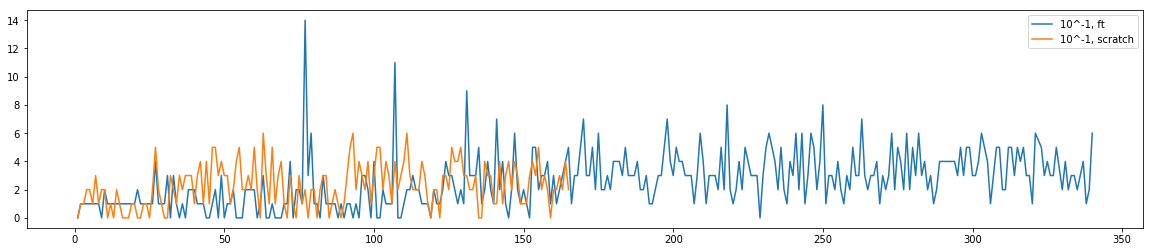

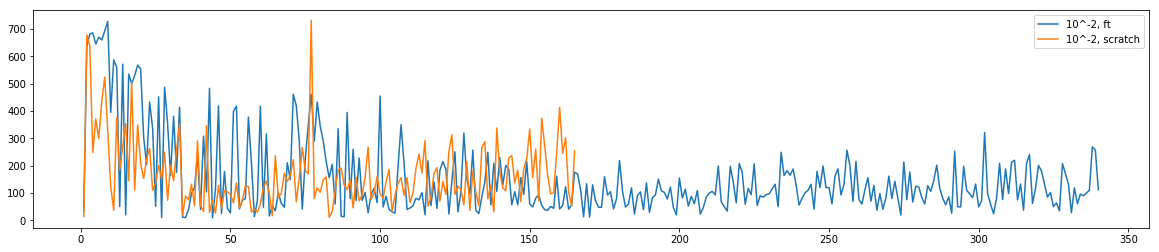

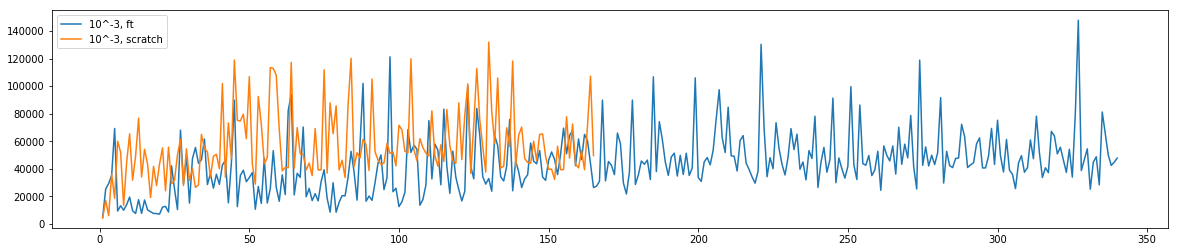

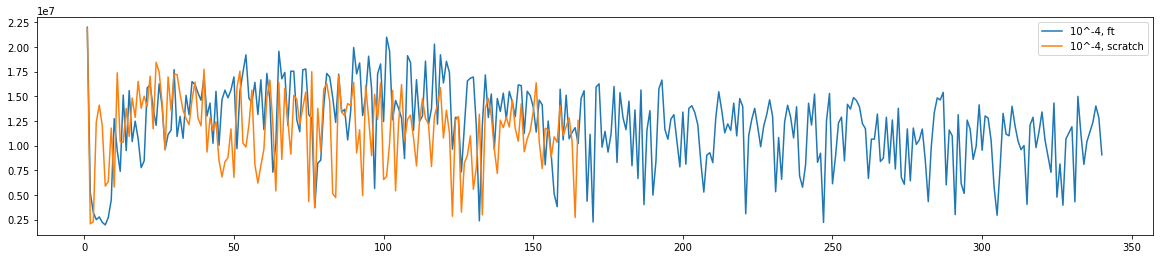

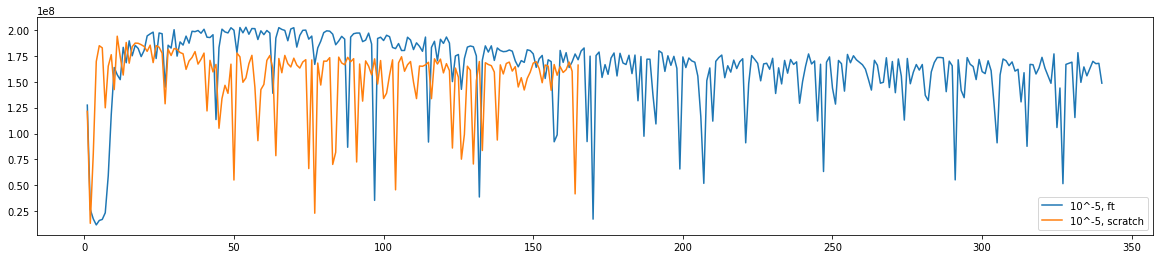

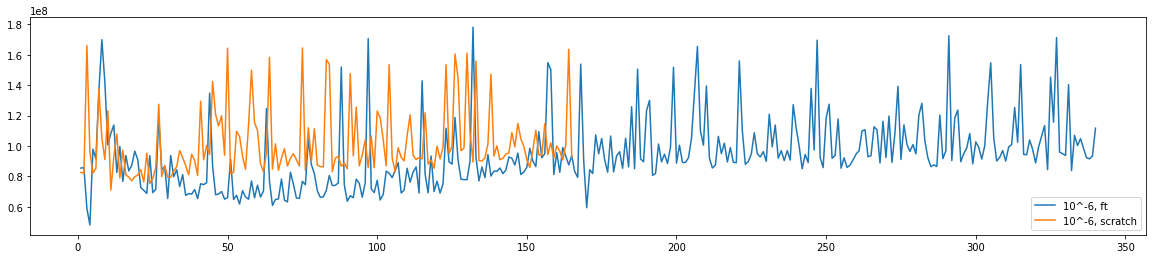

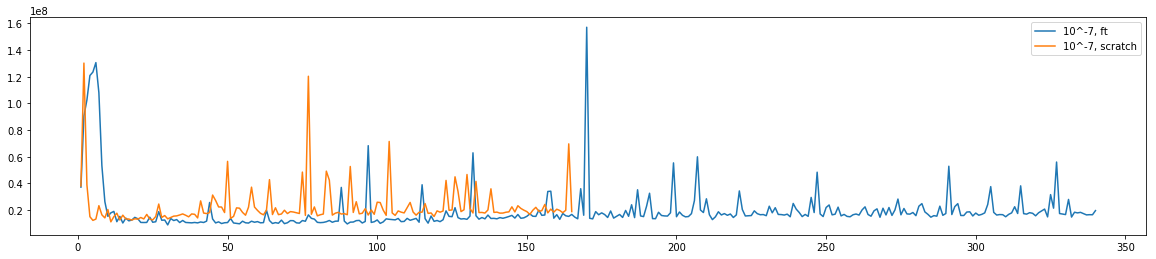

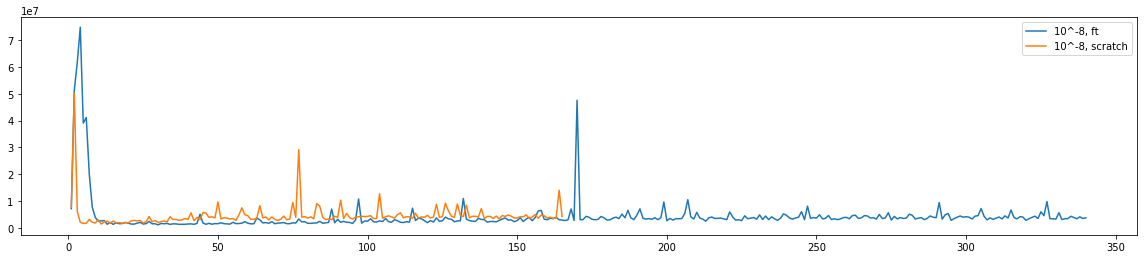

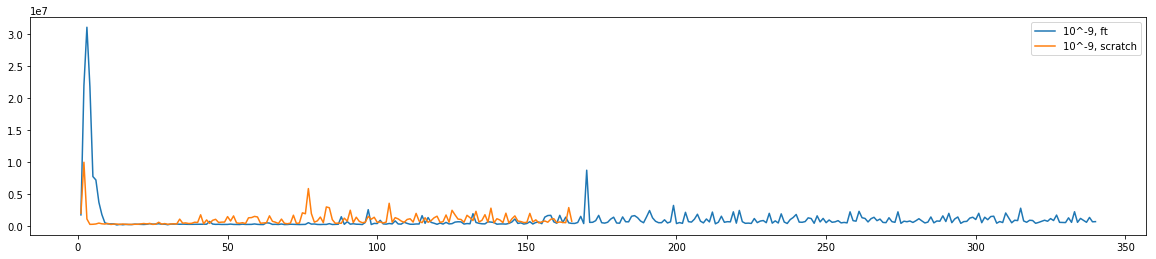

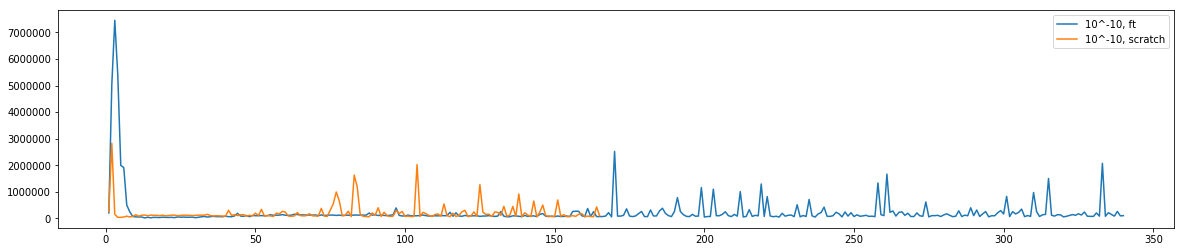

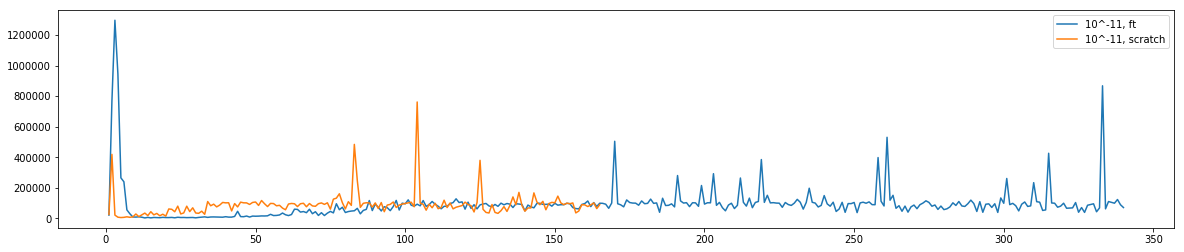

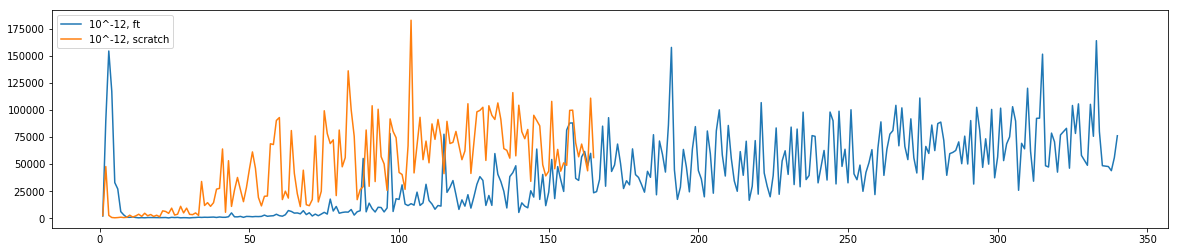

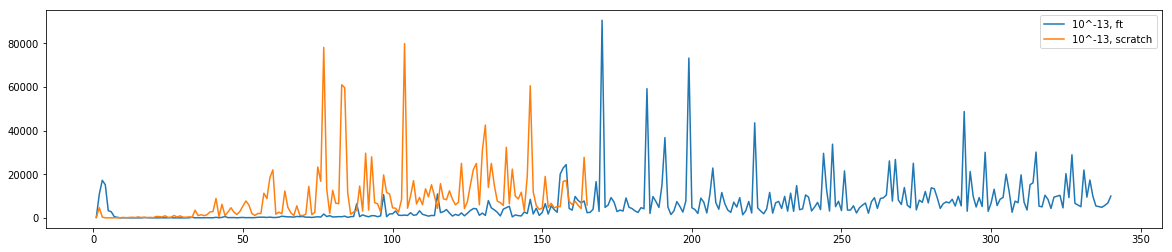

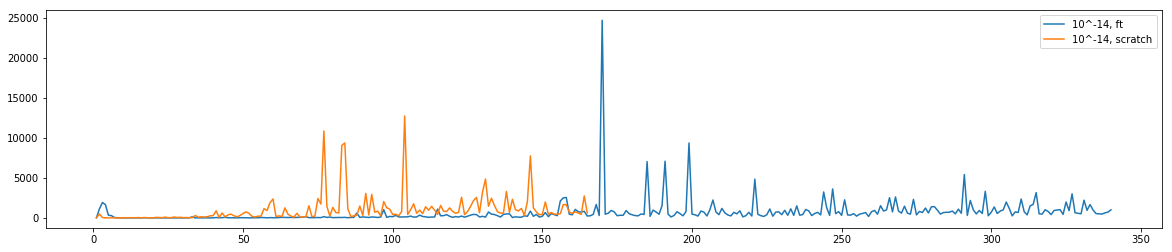

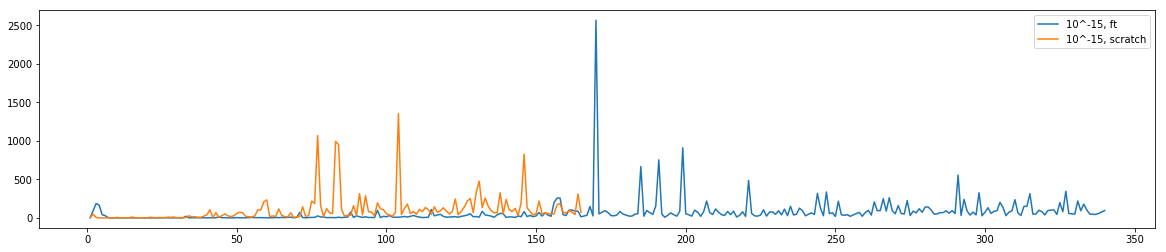

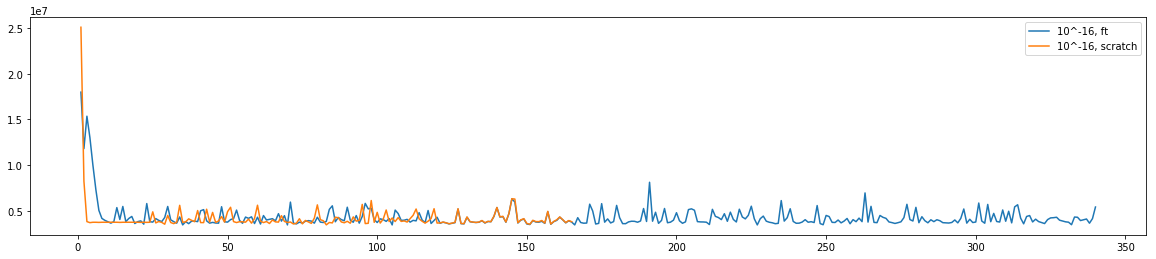

In [40]:
bins_dict_115_list = sorted(bins_dict_115.items(), key=lambda item: item[0])
bins_dict_117_list = sorted(bins_dict_117.items(), key=lambda item: item[0])

x_115 = [item[0] for item in bins_dict_115_list]
val_115 = [item[1] for item in bins_dict_115_list]

x_117 = [item[0] for item in bins_dict_117_list]
val_117 = [item[1] for item in bins_dict_117_list]

for i in range(16):
    plt.figure(figsize=(20,4))
    y_115 = [v[i] for v in val_115]
    y_117 = [v[i] for v in val_117]
    plt.plot(x_115, y_115, label='10^-{}, ft'.format(i+1))
    plt.plot(x_117, y_117, label='10^-{}, scratch'.format(i+1))

    plt.legend()
    plt.show()

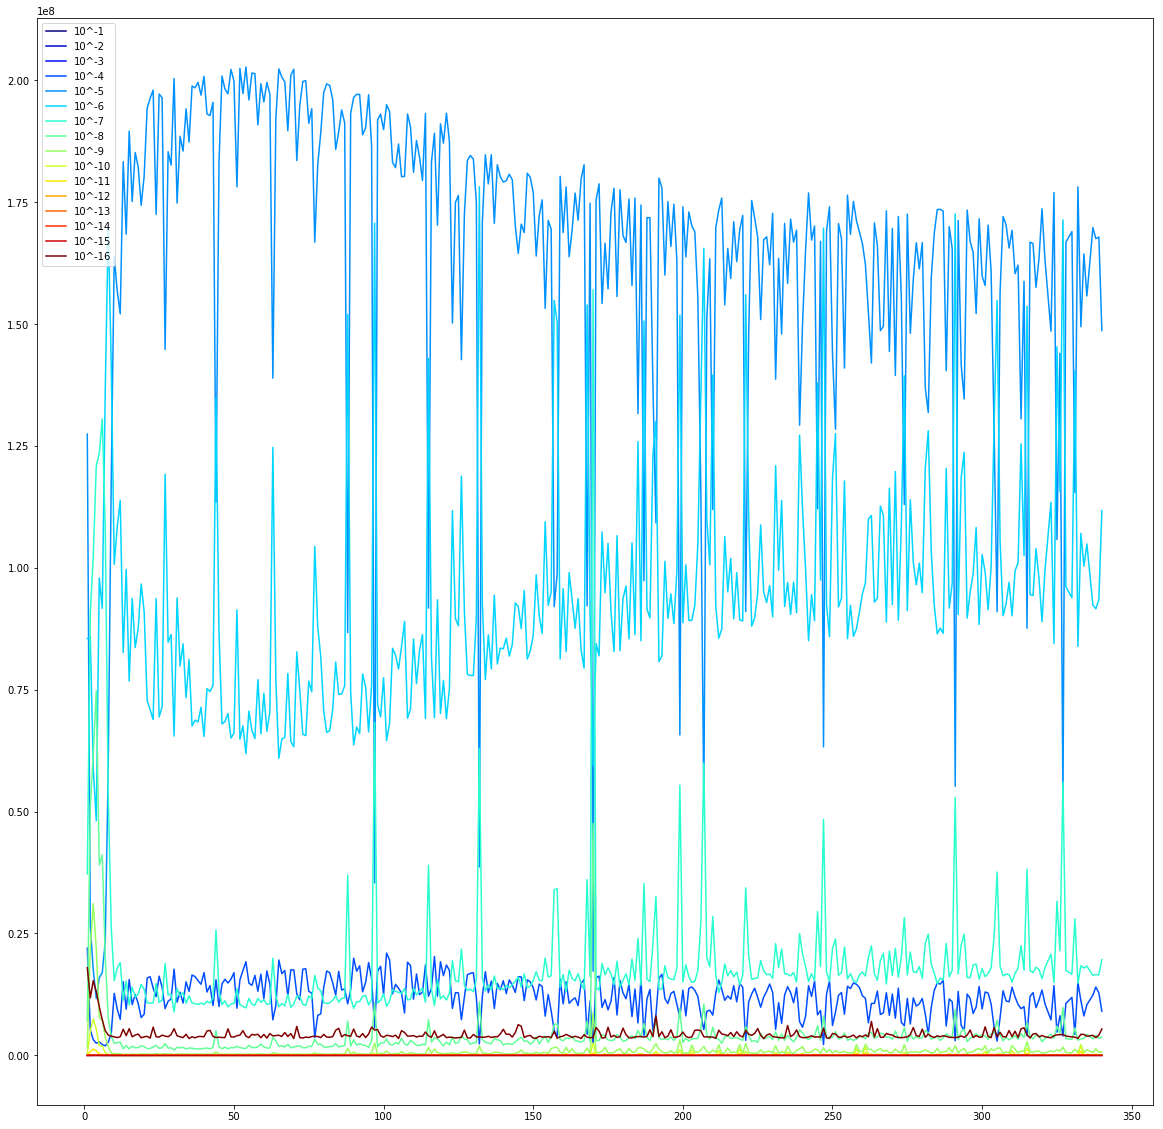

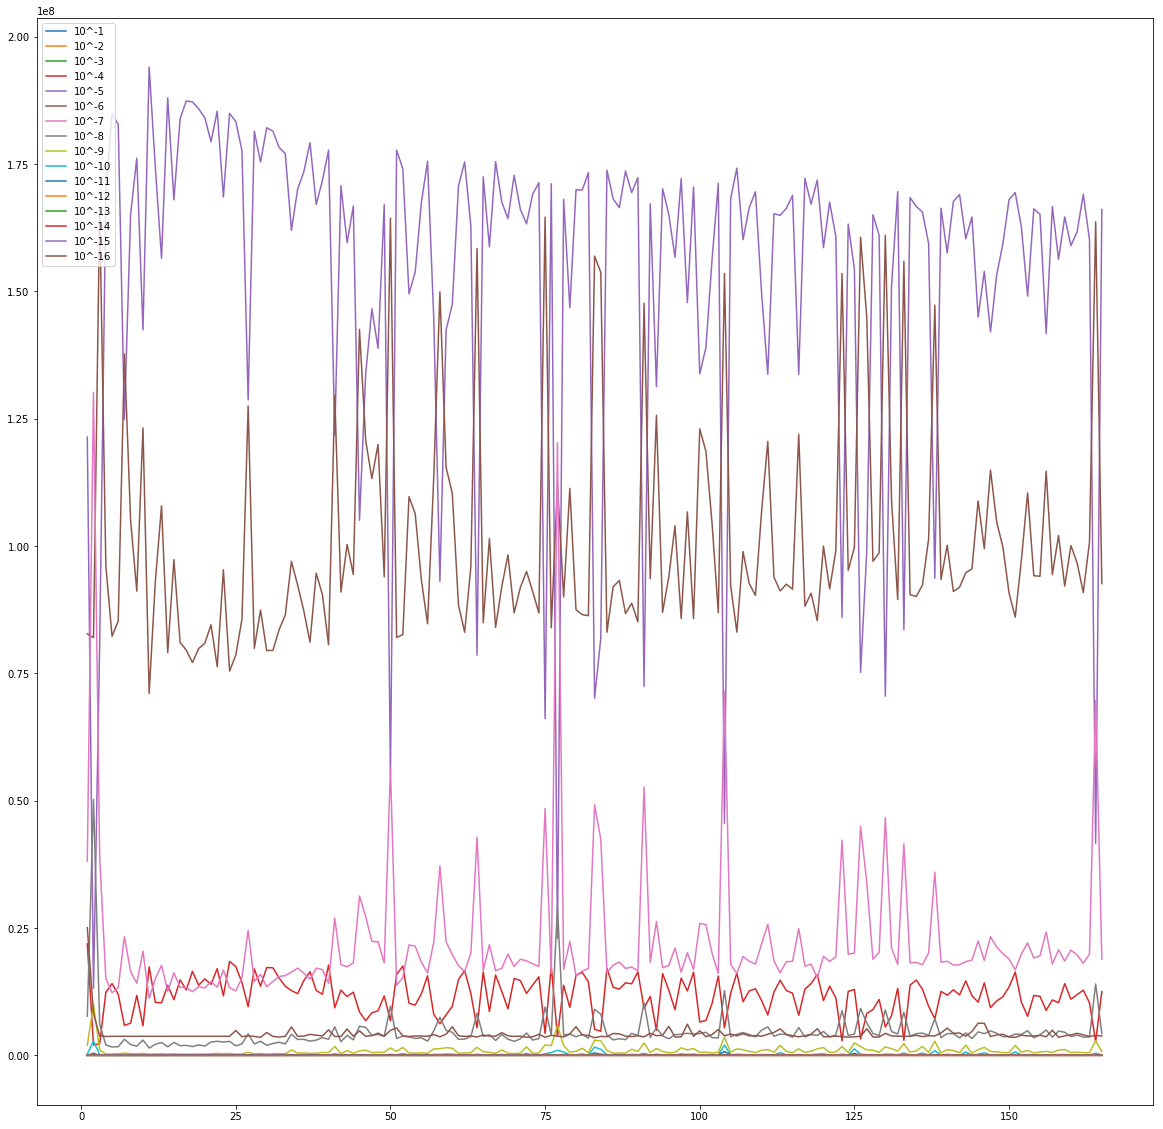

In [50]:
plt.figure(figsize=(20,20))
# colormap = plt.cm.gist_ncar
# plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, 16)])
# colormap = 
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 16))))

x_115 = [item[0] for item in bins_dict_115_list]
for i in range(16):
    y = [v[i] for v in val_115]
    plt.plot(x_115, y, label='10^-{}'.format(i+1))

plt.legend()
plt.show()

x_117 = [item[0] for item in bins_dict_117_list]
plt.figure(figsize=(20,20))
for i in range(16):
    y = [v[i] for v in val_117]
    plt.plot(x_117, y, label='10^-{}'.format(i+1))

plt.legend()
plt.show()

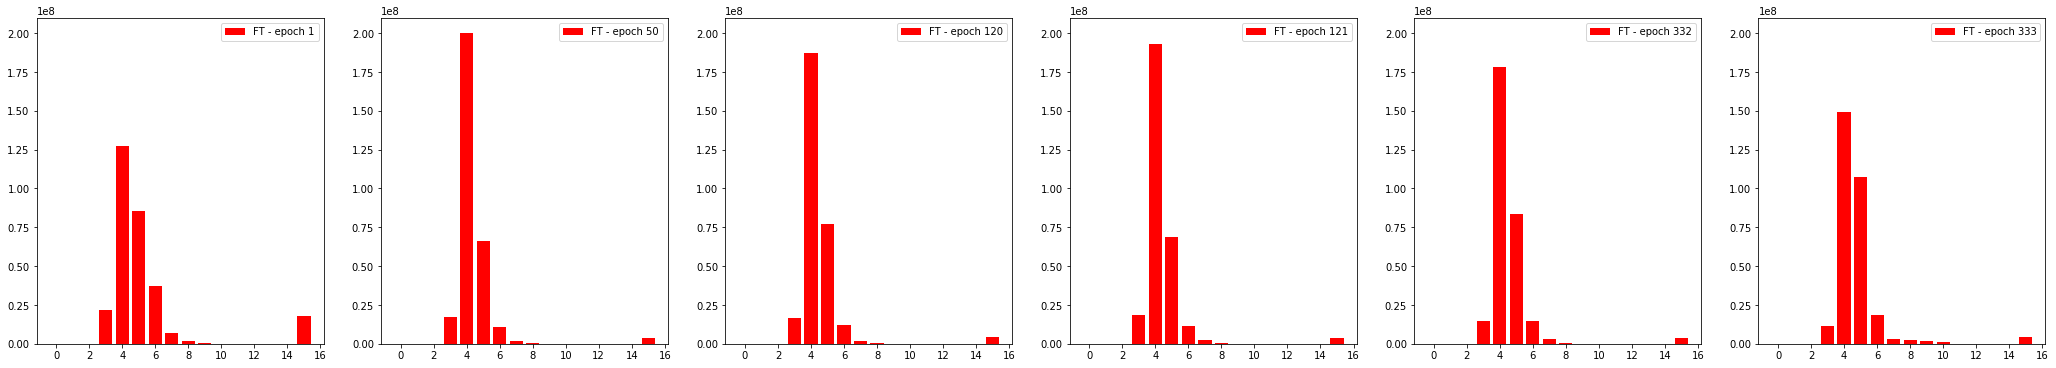

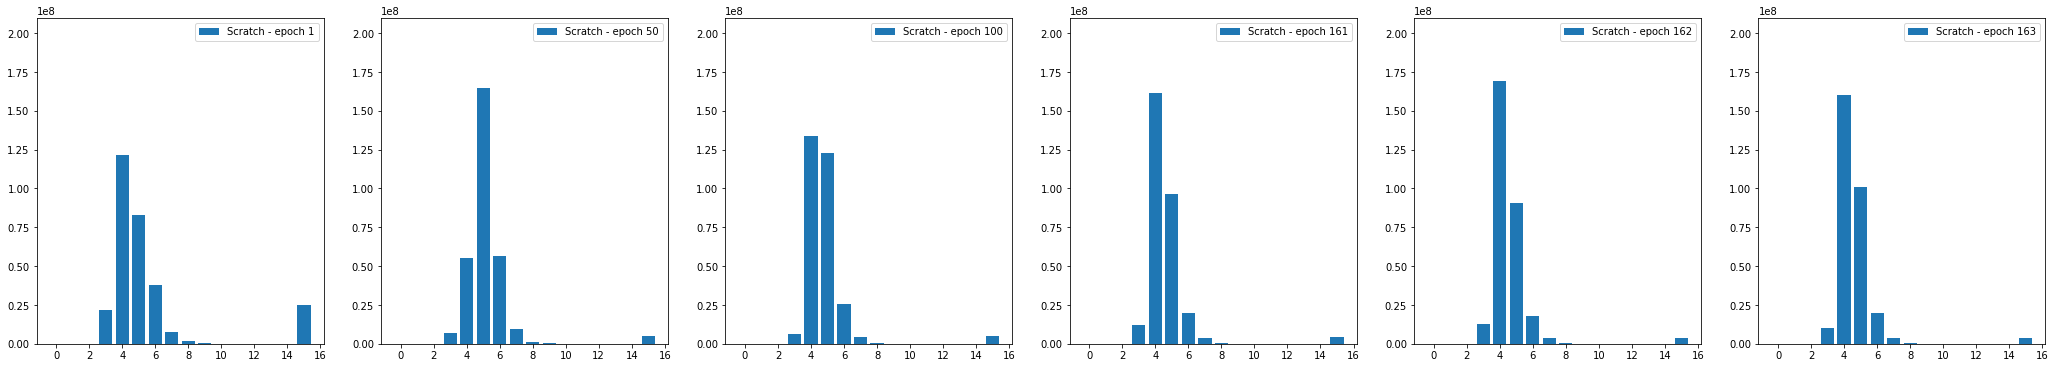

In [96]:
plt.figure(figsize=(nplot * 6, nplot))

epochs = [1, 50, 120, 121, 332, 333]
for i in range(nplot):
    subplot_str = "1{}{}".format(nplot, i + 1)
    epoch = epochs[i]
    plt.subplot(subplot_str)
    y = bins_dict_115[epoch]
    x = range(len(y))
    plt.bar(x, y, color = 'r', label='FT - epoch {}'.format(epoch))
    plt.legend()
    plt.ylim(0, 2.1e8)

plt.show()


epochs = [1, 50, 100, 161, 162, 163]
nplot = len(epochs)

plt.figure(figsize=(nplot * 6, nplot))

for i in range(nplot):
    subplot_str = "1{}{}".format(nplot, i + 1)
    epoch = epochs[i]
    plt.subplot(subplot_str)
    y = bins_dict_117[epoch]
    x = range(len(y))
    plt.bar(x, y, label='Scratch - epoch {}'.format(epoch))
    plt.legend()
    plt.ylim(0, 2.1e8)


plt.show()

In [114]:
def print_bar(i):
    subplot_str = "1{}{}".format(nplot, i + 1)
    plt.subplot(subplot_str)
    partition = epochs[i]
    path = Path('/checkpoint/qiantong/ls_200M/100h/{}/{}.hyp'.format(model, partition))
    if not path.exists():
        print('wtf {}'.format(partition))
    
    bins = [0] * 16
    data = path.read_bytes()
    n_element = len(data) // 4
    floats = struct.unpack('f' * n_element, data)[-(769 * 9998):]
    
    np_floats = np.array(floats)
    for f in floats:
        if abs(f) < 1e-15:
            bins[15] += 1
            continue
        scale = math.floor(math.log10(abs(f)))
        assert scale<=-1 and scale>-16, scale
        bins[-1 - scale] += 1

    print("{} : {}".format(partition, bins))
#     x = range(16)
#     plt.bar(x, bins, color = 'r', label='FT - epoch {}'.format(epoch))
#     plt.legend()
#     plt.show()
#     plt.ylim(0, 2.1e8)

In [115]:
model = 115
epochs = [1, 50, 120, 121, 332, 333]
nplot = len(epochs)

pool = Pool(nplot)
pool.map(print_bar, range(nplot))
pool.close()
pool.join()

1 : [0, 33, 3990, 49764, 700083, 5136462, 1601147, 177501, 17546, 1744, 175, 16, 1, 0, 0, 0]
121 : [0, 195, 4734, 378339, 844891, 1611371, 2564751, 1733579, 348172, 79735, 104017, 16857, 1644, 165, 11, 1]
50 : [0, 21, 5561, 364860, 1026438, 2567286, 2814617, 668130, 139454, 88968, 11767, 1215, 126, 16, 2, 1]
332 : [0, 86, 9532, 231542, 519487, 1685060, 2915411, 1715000, 397091, 64843, 64537, 75310, 9517, 947, 91, 8]
333 : [0, 29, 9803, 56068, 167767, 366665, 732684, 1289287, 1980798, 2040630, 862358, 163195, 17312, 1666, 179, 21]
120 : [0, 163, 16897, 246291, 741797, 2569924, 2873130, 926351, 148380, 98675, 57966, 7944, 852, 81, 9, 2]


<Figure size 2592x432 with 0 Axes>

In [116]:
model = 117
epochs = [1, 50, 100, 161, 162, 163]
nplot = len(epochs)

pool = Pool(nplot)
pool.map(print_bar, range(nplot))
pool.close()
pool.join()

1 : [0, 9, 3767, 37206, 498399, 5057762, 1873069, 196609, 19501, 1908, 208, 20, 2, 1, 0, 1]
50 : [0, 4, 502, 31052, 374170, 907578, 2751037, 2659628, 702525, 114102, 97783, 44131, 5345, 544, 56, 5]
162 : [2, 242, 10397, 226619, 511198, 1740291, 3106469, 1589674, 309417, 46810, 84070, 56821, 5762, 611, 73, 6]
161 : [0, 184, 10122, 210677, 436955, 1605976, 3170820, 1714161, 340834, 50597, 72593, 67190, 7501, 749, 95, 8]
163 : [0, 57, 6272, 257254, 570697, 1786986, 3175502, 1461988, 251619, 33327, 96864, 43174, 4240, 436, 44, 2]
100 : [0, 26, 3582, 196099, 461612, 1736087, 3286730, 1543784, 278012, 42173, 93409, 41868, 4592, 429, 54, 5]


In [117]:
bins_lastlayer_115 = {
1 : [0, 33, 3990, 49764, 700083, 5136462, 1601147, 177501, 17546, 1744, 175, 16, 1, 0, 0, 0],
121 : [0, 195, 4734, 378339, 844891, 1611371, 2564751, 1733579, 348172, 79735, 104017, 16857, 1644, 165, 11, 1],
50 : [0, 21, 5561, 364860, 1026438, 2567286, 2814617, 668130, 139454, 88968, 11767, 1215, 126, 16, 2, 1],
332 : [0, 86, 9532, 231542, 519487, 1685060, 2915411, 1715000, 397091, 64843, 64537, 75310, 9517, 947, 91, 8],
333 : [0, 29, 9803, 56068, 167767, 366665, 732684, 1289287, 1980798, 2040630, 862358, 163195, 17312, 1666, 179, 21],
120 : [0, 163, 16897, 246291, 741797, 2569924, 2873130, 926351, 148380, 98675, 57966, 7944, 852, 81, 9, 2],
}

bins_lastlayer_117 = {
1 : [0, 9, 3767, 37206, 498399, 5057762, 1873069, 196609, 19501, 1908, 208, 20, 2, 1, 0, 1],
50 : [0, 4, 502, 31052, 374170, 907578, 2751037, 2659628, 702525, 114102, 97783, 44131, 5345, 544, 56, 5],
162 : [2, 242, 10397, 226619, 511198, 1740291, 3106469, 1589674, 309417, 46810, 84070, 56821, 5762, 611, 73, 6],
161 : [0, 184, 10122, 210677, 436955, 1605976, 3170820, 1714161, 340834, 50597, 72593, 67190, 7501, 749, 95, 8],
163 : [0, 57, 6272, 257254, 570697, 1786986, 3175502, 1461988, 251619, 33327, 96864, 43174, 4240, 436, 44, 2],
100 : [0, 26, 3582, 196099, 461612, 1736087, 3286730, 1543784, 278012, 42173, 93409, 41868, 4592, 429, 54, 5],
}

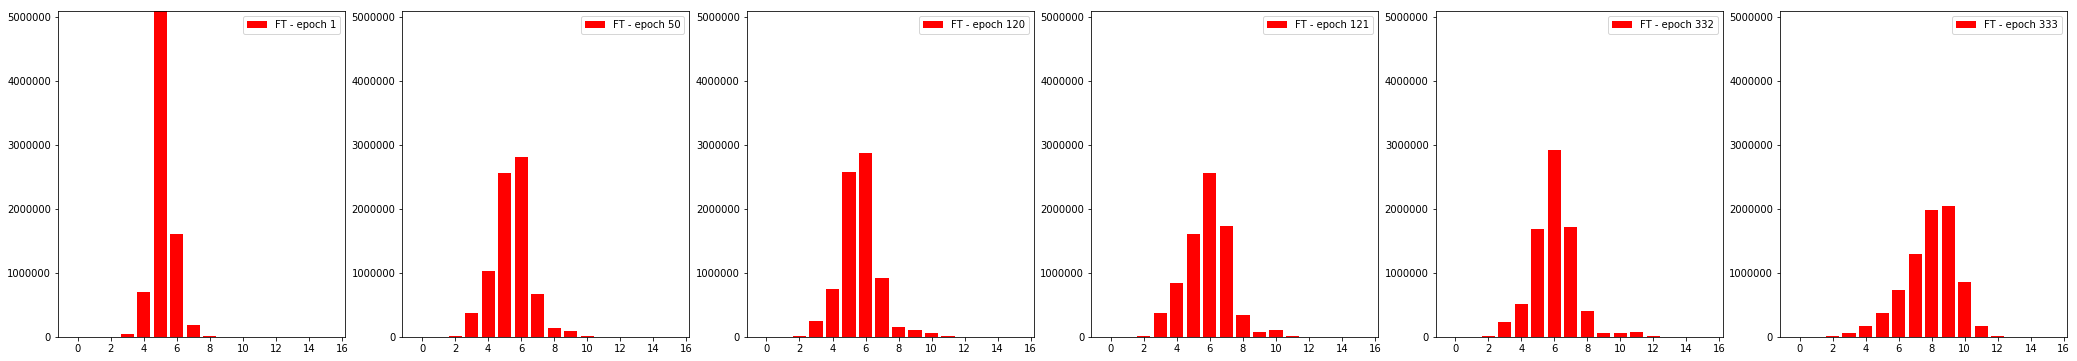

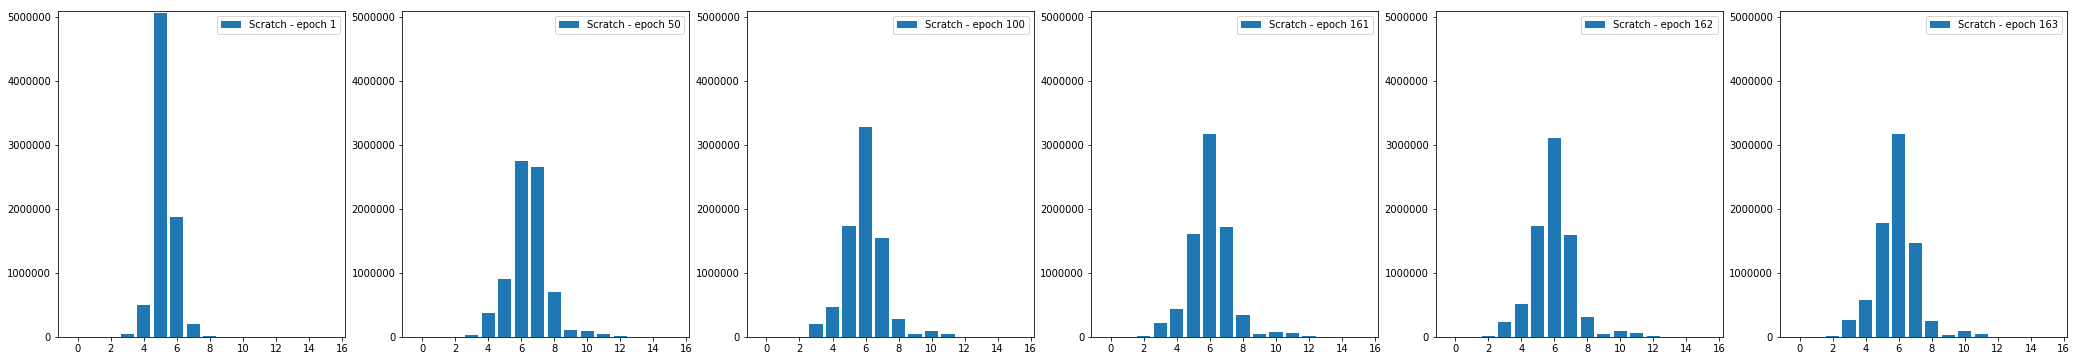

In [125]:
plt.figure(figsize=(nplot * 6, nplot))
epochs = [1, 50, 120, 121, 332, 333]
for i in range(nplot):
    subplot_str = "1{}{}".format(nplot, i + 1)
    epoch = epochs[i]
    plt.subplot(subplot_str)
    y = bins_lastlayer_115[epoch]
    x = range(len(y))
    plt.bar(x, y, color='r', label='FT - epoch {}'.format(epoch))
    plt.legend()
    plt.ylim(0, 5.1e6)
    
plt.figure(figsize=(nplot * 6, nplot))
epochs = [1, 50, 100, 161, 162, 163]
for i in range(nplot):
    subplot_str = "1{}{}".format(nplot, i + 1)
    epoch = epochs[i]
    plt.subplot(subplot_str)
    y = bins_lastlayer_117[epoch]
    x = range(len(y))
    plt.bar(x, y, label='Scratch - epoch {}'.format(epoch))
    plt.legend()
    plt.ylim(0, 5.1e6)

## Learning Curve

In [3]:
log_109 = {}
start_time = 0

with open('/checkpoint/qiantong/ls_200M/100h/109/001_perf') as f:
    for i, line in enumerate(f):
        if i == 0: continue
            
        sp = line.strip().split()
        try:
            hr = float(sp[-2])
            wer = float(sp[-6])
        except:  
            print(sp)
            print(len(sp))
        
        log_109[start_time] = wer
        start_time += hr

with open('/checkpoint/qiantong/ls_200M/100h/109/002_perf') as f:
    for i, line in enumerate(f):
        if i == 0: continue
            
        sp = line.strip().split()
        try:
            hr = float(sp[-2])
            wer = float(sp[-6])
        except:  
            print(sp)
            print(len(sp))
        
        log_109[start_time] = wer
        start_time += hr

In [4]:
log_110 = {}
start_time = 0

with open('/checkpoint/qiantong/ls_200M/100h/110/001_perf') as f:
    for i, line in enumerate(f):
        if i == 0: continue
            
        sp = line.strip().split()
        try:
            hr = float(sp[-2])
            wer = float(sp[-6])
        except:  
            print(sp)
            print(len(sp))
        
        log_110[start_time] = wer
        start_time += hr

with open('/checkpoint/qiantong/ls_200M/100h/110/002_perf') as f:
    for i, line in enumerate(f):
        if i == 0: continue
            
        sp = line.strip().split()
        try:
            hr = float(sp[-2])
            wer = float(sp[-6])
        except:  
            print(sp)
            print(len(sp))
        
        log_110[start_time] = wer
        start_time += hr

<function matplotlib.pyplot.show(*args, **kw)>

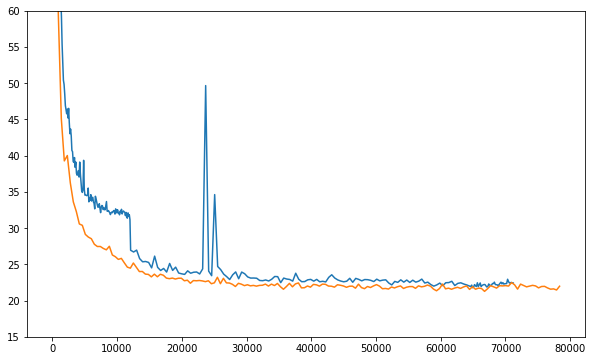

In [5]:
plt.figure(figsize=(10,6))

x_109 = list(log_109.keys())[:280]
y_109 = list(log_109.values())[:280]
plt.plot(x_109, y_109)

x_110 = list(log_110.keys())[:170]
y_110 = list(log_110.values())[:170]
plt.plot(x_110, y_110)

plt.ylim(15,60)
plt.show

In [6]:
log_115 = {}
log_117 = {}

start_time = 0
with open('/checkpoint/qiantong/ls_200M/100h/115/001_perf') as f:
    for i, line in enumerate(f):
        if i == 0: continue
            
        sp = line.strip().split()
        try:
            hr = float(sp[-2])
            wer = float(sp[-6])
        except:  
            print(sp)
            print(len(sp))
        
        log_115[start_time] = wer
        start_time += hr
        
start_time = 0
with open('/checkpoint/qiantong/ls_200M/100h/117/001_perf') as f:
    for i, line in enumerate(f):
        if i == 0: continue
            
        sp = line.strip().split()
        try:
            hr = float(sp[-2])
            wer = float(sp[-6])
        except:  
            print(sp)
            print(len(sp))
        
        log_117[start_time] = wer
        start_time += hr

<function matplotlib.pyplot.show(*args, **kw)>

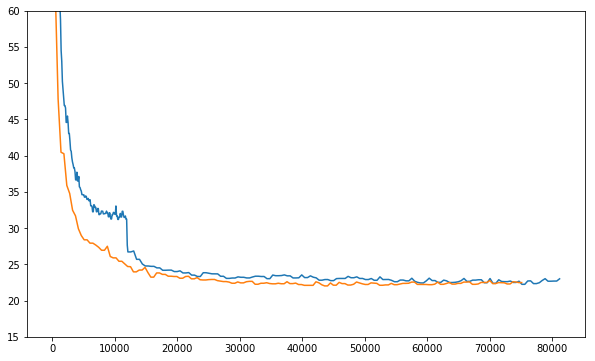

In [36]:
plt.figure(figsize=(10,6))

x_115 = list(log_115.keys())[:270]
y_115 = list(log_115.values())[:271]
y_115 = [min(y_115[i], y_115[i+1]) for i in range(len(y_115) - 1)]
plt.plot(x_115, y_115)

x_117 = list(log_117.keys())[:-1]
y_117 = list(log_117.values())
y_117 = [min(y_117[i], y_117[i+1]) for i in range(len(y_117) - 1)]
plt.plot(x_117, y_117)

plt.ylim(15,60)
plt.show

In [38]:
for i in range(len(x_117)):
    print("({}, {})".format(x_117[i], y_117[i]))

(0, 94.48)
(463.69, 63.07)
(927.38, 47.82)
(1391.07, 40.46)
(1854.76, 40.26)
(2318.45, 35.89)
(2782.14, 34.77)
(3245.83, 32.46)
(3709.52, 31.69)
(4173.21, 29.91)
(4636.9, 28.97)
(5100.589999999999, 28.38)
(5564.279999999999, 28.38)
(6027.969999999998, 27.92)
(6491.659999999998, 27.92)
(6955.349999999998, 27.66)
(7419.039999999997, 27.35)
(7882.729999999997, 26.94)
(8346.419999999996, 26.94)
(8810.109999999997, 27.49)
(9273.799999999997, 26.08)
(9737.489999999998, 25.89)
(10201.179999999998, 25.89)
(10664.869999999999, 25.42)
(11128.56, 25.42)
(11592.25, 25.05)
(12055.94, 24.7)
(12519.630000000001, 24.67)
(12983.320000000002, 23.96)
(13447.010000000002, 23.96)
(13910.700000000003, 24.21)
(14374.390000000003, 24.21)
(14838.080000000004, 24.58)
(15301.770000000004, 23.86)
(15765.460000000005, 23.23)
(16229.150000000005, 23.23)
(16692.840000000004, 23.81)
(17156.530000000002, 23.81)
(17620.22, 23.61)
(18083.91, 23.61)
(18547.6, 23.36)
(19011.289999999997, 23.36)
(19474.979999999996, 23.32)

In [29]:
logs = {}

jobs = [215,210,211,212,214]

for job in jobs:
    start_time = 0
    logs[job] = {}
    with open('/checkpoint/qiantong/ls_200M/100h/{}/001_perf'.format(job)) as f:
        for i, line in enumerate(f):
            if i == 0: continue

            sp = line.strip().split()
            try:
                hr = float(sp[-2])
                wer = float(sp[-6])
            except:  
                print(sp)
                print(len(sp))

            logs[job][start_time] = wer
            start_time += hr
            if start_time > 160000:
                break

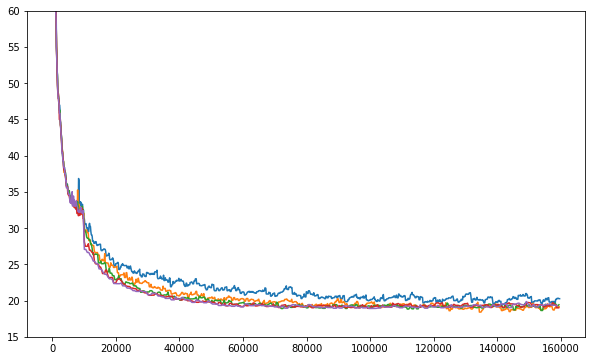

In [41]:
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-2]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1], y[i+2]) for i in range(len(y) - 2)]
    plt.plot(x, smoothed_y)
    plt.ylim(15,60)

plt.show()

In [48]:
x = list(logs[212].keys())[:-1]
y = list(logs[212].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 100.0)
(100.81, 100.0)
(201.62, 100.0)
(302.43, 100.0)
(403.24, 97.53)
(504.05, 94.65)
(604.86, 81.5)
(705.6700000000001, 76.47)
(806.48, 71.52)
(907.29, 69.15)
(1008.0999999999999, 66.51)
(1108.9099999999999, 66.38)
(1209.7199999999998, 60.31)
(1310.5299999999997, 58.58)
(1411.3399999999997, 55.04)
(1512.1499999999996, 53.57)
(1612.9599999999996, 51.62)
(1713.7699999999995, 49.64)
(1814.5799999999995, 48.8)
(1915.3899999999994, 48.55)
(2016.1999999999994, 48.55)
(2117.0099999999993, 47.64)
(2217.8199999999993, 47.45)
(2318.629999999999, 44.98)
(2419.439999999999, 44.98)
(2520.249999999999, 46.04)
(2621.059999999999, 44.95)
(2721.869999999999, 44.09)
(2822.679999999999, 42.91)
(2923.489999999999, 42.71)
(3024.299999999999, 41.93)
(3125.1099999999988, 40.66)
(3225.9199999999987, 40.66)
(3326.7299999999987, 40.4)
(3427.5399999999986, 39.5)
(3528.3499999999985, 39.5)
(3629.1599999999985, 38.45)
(3729.9699999999984, 38.02)
(3830.7799999999984, 38.02)
(3931.5899999999983, 39.07)
(4032.3

In [61]:
logs = {}

jobs = [410,401,305,306,214,416]

for job in jobs:
    start_time = 0
    logs[job] = {}
    with open('/checkpoint/qiantong/ls_200M/100h/{}/001_perf'.format(job)) as f:
        for i, line in enumerate(f):
            if i == 0: continue

            sp = line.strip().split()
            try:
                hr = float(sp[-2])
                wer = float(sp[-6])
            except:  
                print(sp)
                print(len(sp))

            logs[job][start_time] = wer
            start_time += hr
            if start_time > 110000:
                break

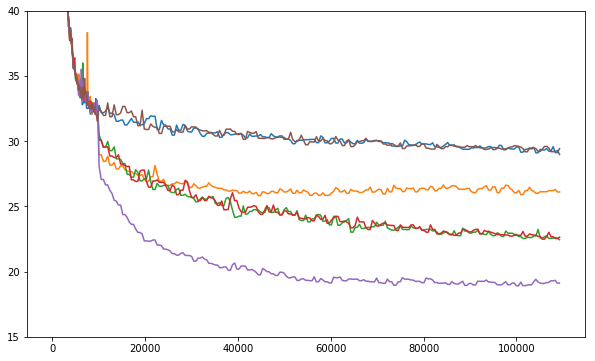

In [62]:
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(15,40)

plt.show()

In [63]:
x = list(logs[416].keys())[:-1]
y = list(logs[416].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 100.0)
(100.81, 100.0)
(201.62, 100.0)
(302.43, 100.0)
(403.24, 98.38)
(504.05, 92.05)
(604.86, 80.84)
(705.6700000000001, 76.97)
(806.48, 72.9)
(907.29, 69.14)
(1008.0999999999999, 66.4)
(1108.9099999999999, 65.88)
(1209.7199999999998, 59.62)
(1310.5299999999997, 57.86)
(1411.3399999999997, 54.24)
(1512.1499999999996, 54.24)
(1612.9599999999996, 51.58)
(1713.7699999999995, 50.78)
(1814.5799999999995, 49.46)
(1915.3899999999994, 48.25)
(2016.1999999999994, 48.22)
(2117.0099999999993, 47.23)
(2217.8199999999993, 46.61)
(2318.629999999999, 45.54)
(2419.439999999999, 45.54)
(2520.249999999999, 45.62)
(2621.059999999999, 44.3)
(2721.869999999999, 43.58)
(2822.679999999999, 42.79)
(2923.489999999999, 42.41)
(3024.299999999999, 42.11)
(3125.1099999999988, 41.14)
(3225.9199999999987, 40.3)
(3326.7299999999987, 40.3)
(3427.5399999999986, 39.27)
(3528.3499999999985, 39.27)
(3629.1599999999985, 39.01)
(3729.9699999999984, 37.77)
(3830.7799999999984, 37.77)
(3931.5899999999983, 38.55)
(4032.3

/checkpoint/qiantong/ls_200M/100h/51/001_perf
/checkpoint/qiantong/ls_200M/100h/51/002_perf
/checkpoint/qiantong/ls_200M/100h/51/003_perf
/checkpoint/qiantong/ls_200M/100h/51/004_perf
/checkpoint/qiantong/ls_200M/100h/51/005_perf
/checkpoint/qiantong/ls_200M/100h/51/006_perf
/checkpoint/qiantong/ls_200M/100h/51/007_perf
/checkpoint/qiantong/ls_200M/100h/51/008_perf


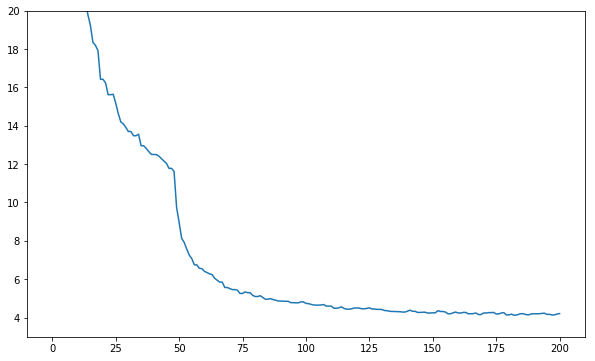

In [30]:
logs = {}

jobs = [51]

for job in jobs:
    start_time = 0
    logs[job] = {}
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/51/{}_perf'.format(str(jb + 1).zfill(3))
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += 1
                if start_time > 200:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(3,20)

plt.show()

In [31]:
x = list(logs[51].keys())[:-1]
y = list(logs[51].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 78.84)
(1, 66.56)
(2, 51.54)
(3, 40.96)
(4, 34.64)
(5, 29.97)
(6, 27.98)
(7, 25.25)
(8, 23.9)
(9, 23.9)
(10, 23.82)
(11, 22.44)
(12, 21.56)
(13, 20.57)
(14, 19.8)
(15, 19.25)
(16, 18.35)
(17, 18.19)
(18, 17.92)
(19, 16.42)
(20, 16.42)
(21, 16.23)
(22, 15.62)
(23, 15.62)
(24, 15.64)
(25, 15.18)
(26, 14.64)
(27, 14.2)
(28, 14.1)
(29, 13.91)
(30, 13.7)
(31, 13.7)
(32, 13.48)
(33, 13.48)
(34, 13.56)
(35, 12.96)
(36, 12.96)
(37, 12.82)
(38, 12.66)
(39, 12.51)
(40, 12.5)
(41, 12.5)
(42, 12.42)
(43, 12.29)
(44, 12.16)
(45, 12.04)
(46, 11.78)
(47, 11.78)
(48, 11.62)
(49, 9.75)
(50, 8.96)
(51, 8.13)
(52, 7.92)
(53, 7.57)
(54, 7.26)
(55, 7.07)
(56, 6.75)
(57, 6.75)
(58, 6.57)
(59, 6.55)
(60, 6.41)
(61, 6.35)
(62, 6.28)
(63, 6.24)
(64, 6.05)
(65, 5.95)
(66, 5.85)
(67, 5.85)
(68, 5.57)
(69, 5.57)
(70, 5.51)
(71, 5.46)
(72, 5.46)
(73, 5.43)
(74, 5.26)
(75, 5.26)
(76, 5.34)
(77, 5.3)
(78, 5.3)
(79, 5.16)
(80, 5.1)
(81, 5.1)
(82, 5.14)
(83, 5.05)
(84, 4.96)
(85, 4.96)
(86, 4.99)
(87, 4.94)
(88, 4

/checkpoint/qiantong/ls_200M/100h/88/001_perf
/checkpoint/qiantong/ls_200M/100h/88/002_perf
/checkpoint/qiantong/ls_200M/100h/88/003_perf
/checkpoint/qiantong/ls_200M/100h/72/001_perf
/checkpoint/qiantong/ls_200M/100h/72/002_perf
/checkpoint/qiantong/ls_200M/100h/72/003_perf
/checkpoint/qiantong/ls_200M/100h/72/004_perf


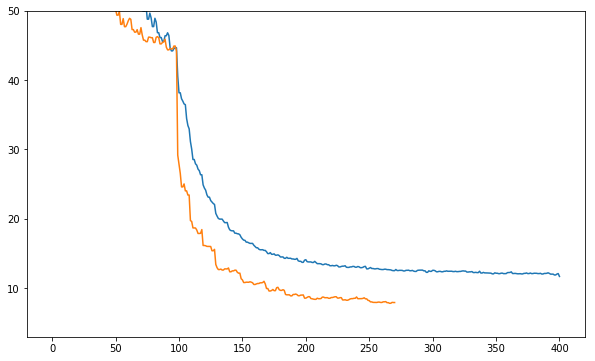

In [32]:
import os

logs = {}

jobs = [88,72]

for job in jobs:
    start_time = 0
    logs[job] = {}
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/{}/{}_perf'.format(job, str(jb + 1).zfill(3))
        if not os.path.exists(fpath):
            break
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += 1
                if start_time > 400:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(3,50)

plt.show()

In [35]:
x = list(logs[72].keys())[:-1]
y = list(logs[72].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 100.0)
(1, 100.0)
(2, 100.0)
(3, 100.0)
(4, 100.0)
(5, 100.0)
(6, 100.0)
(7, 100.0)
(8, 100.0)
(9, 100.0)
(10, 94.68)
(11, 91.68)
(12, 89.55)
(13, 82.85)
(14, 82.85)
(15, 82.64)
(16, 75.89)
(17, 75.89)
(18, 73.13)
(19, 73.13)
(20, 72.94)
(21, 69.6)
(22, 69.49)
(23, 69.49)
(24, 68.64)
(25, 68.64)
(26, 68.12)
(27, 68.12)
(28, 65.44)
(29, 65.29)
(30, 65.29)
(31, 64.42)
(32, 62.84)
(33, 61.96)
(34, 60.98)
(35, 58.54)
(36, 58.53)
(37, 56.62)
(38, 56.62)
(39, 57.07)
(40, 54.1)
(41, 54.1)
(42, 53.45)
(43, 52.37)
(44, 52.37)
(45, 52.48)
(46, 51.86)
(47, 51.86)
(48, 51.78)
(49, 50.17)
(50, 50.17)
(51, 49.35)
(52, 49.35)
(53, 49.9)
(54, 48.02)
(55, 48.02)
(56, 48.85)
(57, 47.69)
(58, 47.69)
(59, 48.05)
(60, 48.54)
(61, 48.89)
(62, 48.75)
(63, 47.27)
(64, 47.27)
(65, 46.9)
(66, 46.9)
(67, 47.26)
(68, 46.61)
(69, 46.61)
(70, 47.55)
(71, 46.5)
(72, 45.75)
(73, 45.75)
(74, 45.53)
(75, 45.53)
(76, 46.18)
(77, 46.18)
(78, 46.1)
(79, 46.1)
(80, 45.41)
(81, 45.41)
(82, 46.16)
(83, 46.25)
(84, 46.11)

/checkpoint/qiantong/ls_200M/100h/913/001_perf
/checkpoint/qiantong/ls_200M/100h/913/002_perf
/checkpoint/qiantong/ls_200M/100h/913/003_perf
/checkpoint/qiantong/ls_200M/100h/913/004_perf
/checkpoint/qiantong/ls_200M/100h/913/005_perf
/checkpoint/qiantong/ls_200M/100h/913/006_perf
/checkpoint/qiantong/ls_200M/100h/913/007_perf
/checkpoint/qiantong/ls_200M/100h/919/001_perf


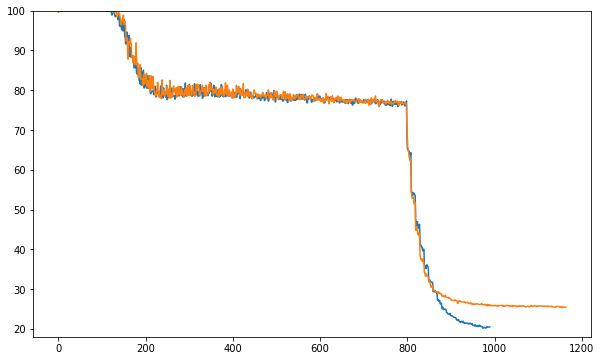

In [85]:
import os

logs = {}

jobs = [913,919]

for job in jobs:
    start_time = 0
    logs[job] = {}
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/{}/{}_perf'.format(job, str(jb + 1).zfill(3))
        if not os.path.exists(fpath):
            break
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += 1
                if start_time > 1400:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(18,100)

plt.show()

In [87]:
x = list(logs[919].keys())[:-1]
y = list(logs[919].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 99.6)
(1, 100.0)
(2, 100.0)
(3, 100.0)
(4, 100.0)
(5, 100.0)
(6, 100.0)
(7, 100.0)
(8, 100.0)
(9, 100.0)
(10, 100.0)
(11, 100.0)
(12, 100.0)
(13, 100.0)
(14, 100.0)
(15, 100.0)
(16, 100.0)
(17, 100.0)
(18, 100.0)
(19, 100.0)
(20, 100.0)
(21, 100.0)
(22, 100.0)
(23, 100.0)
(24, 100.0)
(25, 100.0)
(26, 100.0)
(27, 100.0)
(28, 100.0)
(29, 100.0)
(30, 100.0)
(31, 100.0)
(32, 100.0)
(33, 100.0)
(34, 100.0)
(35, 100.0)
(36, 100.0)
(37, 100.0)
(38, 100.0)
(39, 100.0)
(40, 100.0)
(41, 100.0)
(42, 100.0)
(43, 100.0)
(44, 100.0)
(45, 100.0)
(46, 100.0)
(47, 100.0)
(48, 100.0)
(49, 100.0)
(50, 100.0)
(51, 100.0)
(52, 100.0)
(53, 100.0)
(54, 100.0)
(55, 100.0)
(56, 100.0)
(57, 100.0)
(58, 100.0)
(59, 100.0)
(60, 100.0)
(61, 100.0)
(62, 100.0)
(63, 100.0)
(64, 100.0)
(65, 100.0)
(66, 100.0)
(67, 100.0)
(68, 100.0)
(69, 100.0)
(70, 100.0)
(71, 100.0)
(72, 100.0)
(73, 100.0)
(74, 100.0)
(75, 100.0)
(76, 100.0)
(77, 100.0)
(78, 100.0)
(79, 100.0)
(80, 100.0)
(81, 100.0)
(82, 100.0)
(83, 100.0)
(84

/checkpoint/qiantong/ls_200M/100h/55/001_perf
/checkpoint/qiantong/ls_200M/100h/55/002_perf
/checkpoint/qiantong/ls_200M/100h/84/001_perf
/checkpoint/qiantong/ls_200M/100h/96/001_perf
/checkpoint/qiantong/ls_200M/100h/72/001_perf
/checkpoint/qiantong/ls_200M/100h/72/002_perf
/checkpoint/qiantong/ls_200M/100h/72/003_perf
/checkpoint/qiantong/ls_200M/100h/72/004_perf
/checkpoint/gab/experiments/speech/libri/january2020/lr0.03_lrc0.03_lrd1200_lrds500_bs5_mgn1.0_G32_wmup40000_adagrad_b10.95_b20.99_mfb80_archEG_GLU6x2048_TR24x768_DO0.3_LD0.3_CTC_Train_0117_CTC/001_perf


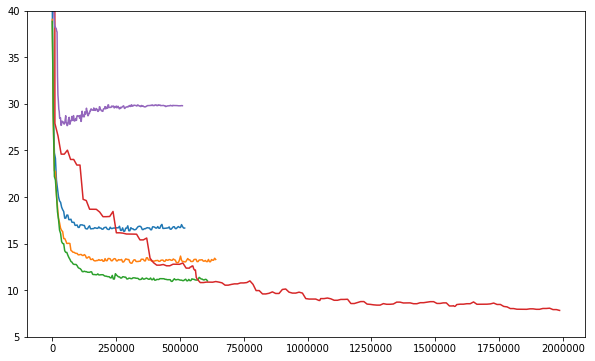

In [92]:
import os

logs = {}

jobs = [55,84,96,72, 0]

for job in jobs:
    start_time = 0
    logs[job] = {}
    if job == 0:
        fpath = '/checkpoint/gab/experiments/speech/libri/january2020/lr0.03_lrc0.03_lrd1200_lrds500_bs5_mgn1.0_G32_wmup40000_adagrad_b10.95_b20.99_mfb80_archEG_GLU6x2048_TR24x768_DO0.3_LD0.3_CTC_Train_0117_CTC/001_perf'
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += hr
                if start_time > 2000000:
                    break
        continue
    
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/{}/{}_perf'.format(job, str(jb + 1).zfill(3))
        if not os.path.exists(fpath):
            break
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += hr
                if start_time > 2000000:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(5,40)

plt.show()

/checkpoint/qiantong/ls_200M/100h/39/001_perf
/checkpoint/qiantong/ls_200M/100h/56/001_perf
/checkpoint/qiantong/ls_200M/100h/89/001_perf
/checkpoint/qiantong/ls_200M/100h/82/001_perf
/checkpoint/qiantong/ls_200M/100h/82/002_perf
/checkpoint/gab/experiments/speech/libri/january2020/lr0.03_lrc0.03_lrd1200_lrds500_bs5_mgn1.0_G32_wmup40000_adagrad_b10.95_b20.99_mfb80_archEG_GLU6x2048_TR24x768_DO0.3_LD0.3_CTC_Train_0117_CTC/001_perf


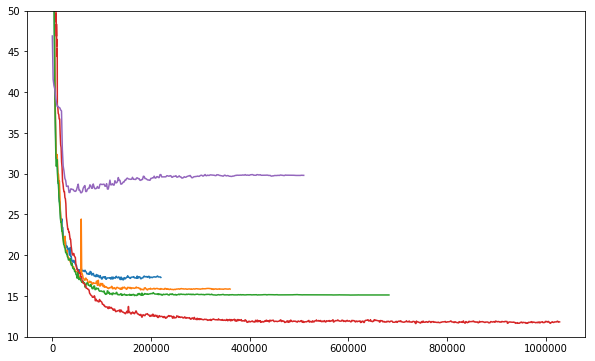

In [97]:
import os

logs = {}

jobs = [39,56,89,82, 0]

for job in jobs:
    start_time = 0
    logs[job] = {}
    if job == 0:
        fpath = '/checkpoint/gab/experiments/speech/libri/january2020/lr0.03_lrc0.03_lrd1200_lrds500_bs5_mgn1.0_G32_wmup40000_adagrad_b10.95_b20.99_mfb80_archEG_GLU6x2048_TR24x768_DO0.3_LD0.3_CTC_Train_0117_CTC/001_perf'
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += hr
                if start_time > 2000000:
                    break
        continue
    
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/{}/{}_perf'.format(job, str(jb + 1).zfill(3))
        if not os.path.exists(fpath):
            break
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += hr
                if start_time > 2000000:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(10,50)

plt.show()

In [98]:
x = list(logs[0].keys())[:-1]
y = list(logs[0].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 46.89)
(1692.61, 41.58)
(3387.85, 40.78)
(5078.19, 40.37)
(6772.59, 39.3)
(8464.5, 38.68)
(10158.59, 38.24)
(11850.46, 38.24)
(13543.98, 38.12)
(15236.36, 38.08)
(16930.66, 37.82)
(18622.02, 37.7)
(20315.420000000002, 33.0)
(22008.280000000002, 30.96)
(23698.63, 30.3)
(25394.96, 29.44)
(27087.73, 29.17)
(28780.94, 28.45)
(30473.55, 28.45)
(32168.3, 28.49)
(33859.72, 27.7)
(35553.12, 27.7)
(37245.950000000004, 28.13)
(38936.18000000001, 28.13)
(40631.87000000001, 28.07)
(42324.69000000001, 28.07)
(44018.22000000001, 27.9)
(45710.850000000006, 27.84)
(47402.130000000005, 27.84)
(49096.240000000005, 28.02)
(50790.61000000001, 28.4)
(52482.01000000001, 28.72)
(54176.05000000001, 27.97)
(55867.94000000001, 27.97)
(57561.38000000001, 27.67)
(59254.88000000001, 27.67)
(60946.51000000001, 27.82)
(62640.19000000001, 28.23)
(64333.00000000001, 28.42)
(66026.25, 28.55)
(67722.23, 27.82)
(69410.89, 27.82)
(71105.18, 28.08)
(72801.34999999999, 28.2)
(74492.20999999999, 28.2)
(76184.63999999998,

/checkpoint/qiantong/ls_200M/100h/815/001_perf
/checkpoint/qiantong/ls_200M/100h/815/002_perf
/checkpoint/qiantong/ls_200M/100h/835/001_perf
/checkpoint/qiantong/ls_200M/100h/850/001_perf


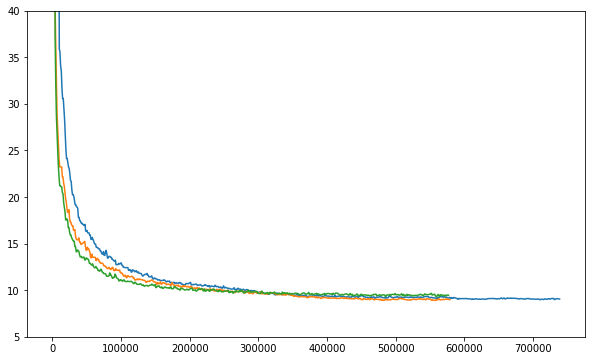

In [80]:
import os

logs = {}

jobs = [815,835,850]

for job in jobs:
    start_time = 0
    logs[job] = {}
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/{}/{}_perf'.format(job, str(jb + 1).zfill(3))
        if not os.path.exists(fpath):
            break
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += hr
                if start_time > 2000000:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(5,40)

plt.show()

In [57]:
x = list(logs[835].keys())[:-1]
y = list(logs[835].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 100.0)
(101.71, 100.0)
(203.42, 100.0)
(305.13, 100.0)
(406.84, 100.0)
(508.54999999999995, 100.0)
(610.26, 100.0)
(711.97, 100.0)
(813.6800000000001, 100.0)
(915.3900000000001, 100.0)
(1017.1000000000001, 100.0)
(1118.8100000000002, 100.0)
(1220.5200000000002, 100.0)
(1322.2300000000002, 100.0)
(1423.9400000000003, 100.0)
(1525.6500000000003, 100.0)
(1627.3600000000004, 99.34)
(1729.0700000000004, 99.34)
(1830.7800000000004, 94.29)
(1932.4900000000005, 93.23)
(2034.2000000000005, 92.9)
(2135.9100000000003, 90.3)
(2237.6200000000003, 87.64)
(2339.3300000000004, 81.09)
(2441.0400000000004, 81.09)
(2542.7500000000005, 77.17)
(2644.4600000000005, 76.48)
(2746.1700000000005, 76.48)
(2847.8800000000006, 72.23)
(2949.5900000000006, 72.23)
(3051.3000000000006, 72.93)
(3153.0100000000007, 72.68)
(3254.7200000000007, 68.77)
(3356.4300000000007, 68.77)
(3458.140000000001, 70.03)
(3559.850000000001, 65.73)
(3661.560000000001, 65.67)
(3763.270000000001, 65.67)
(3864.980000000001, 64.54)
(3966.

/checkpoint/qiantong/ls_200M/100h/900/001_perf
/checkpoint/qiantong/ls_200M/100h/900/002_perf
/checkpoint/qiantong/ls_200M/100h/917/001_perf
/checkpoint/qiantong/ls_200M/100h/917/002_perf
/checkpoint/qiantong/ls_200M/100h/917/003_perf


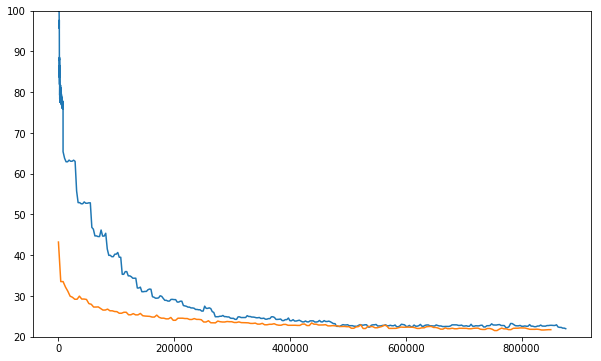

In [82]:
import os

logs = {}

jobs = [900,917]

for job in jobs:
    start_time = 0
    logs[job] = {}
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/{}/{}_perf'.format(job, str(jb + 1).zfill(3))
        if not os.path.exists(fpath):
            break
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += hr
                if start_time > 2000000:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(20,100)

plt.show()

/checkpoint/qiantong/ls_200M/100h/919/001_perf
/checkpoint/qiantong/ls_200M/100h/921/001_perf


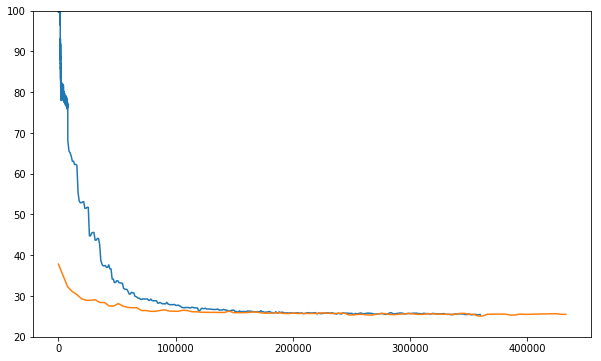

In [89]:
import os

logs = {}

jobs = [919,921]

for job in jobs:
    start_time = 0
    logs[job] = {}
    for jb in range(8):
        fpath = '/checkpoint/qiantong/ls_200M/100h/{}/{}_perf'.format(job, str(jb + 1).zfill(3))
        if not os.path.exists(fpath):
            break
        with open(fpath) as f:
            print(fpath)
            for i, line in enumerate(f):
                if i == 0: continue

                sp = line.strip().split()
                try:
                    hr = float(sp[-2])
                    wer = float(sp[-6])
                except:  
                    print(sp)
                    print(len(sp))

                logs[job][start_time] = wer
                start_time += hr
                if start_time > 2000000:
                    break
          
plt.figure(figsize=(10,6))

for job in jobs:
    x = list(logs[job].keys())[:-1]
    y = list(logs[job].values())
    smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
    plt.plot(x, smoothed_y)
    plt.ylim(20,100)

plt.show()

In [91]:
x = list(logs[921].keys())[:-1]
y = list(logs[921].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 37.83)
(3933.8, 35.03)
(7858.8, 32.25)
(11797.92, 31.1)
(15732.11, 30.37)
(19666.620000000003, 29.34)
(23582.450000000004, 28.96)
(27524.410000000003, 28.96)
(31465.850000000002, 29.07)
(35391.65, 28.41)
(39333.69, 28.41)
(43263.420000000006, 27.56)
(47203.69, 27.56)
(51135.05, 28.15)
(55068.73, 27.54)
(59002.71000000001, 27.21)
(62938.18000000001, 27.13)
(66879.07, 27.13)
(70812.3, 26.44)
(74745.48, 26.44)
(78681.53, 26.25)
(82627.91, 26.25)
(86543.06, 26.44)
(90479.87, 26.62)
(94406.93, 26.32)
(98344.06999999999, 26.26)
(102281.93999999999, 26.26)
(106210.46999999999, 26.51)
(110155.37999999999, 26.44)
(114082.20999999999, 26.14)
(118016.9, 26.14)
(121944.18, 26.01)
(125889.54999999999, 26.01)
(129819.51999999999, 25.99)
(133753.03, 25.99)
(137691.66, 25.97)
(141625.84, 25.97)
(145563.13, 26.31)
(149499.57, 25.92)
(153429.21000000002, 25.91)
(157371.03000000003, 25.91)
(161298.50000000003, 25.95)
(165221.70000000004, 26.07)
(169170.67000000004, 26.07)
(173101.42000000004, 25.85)


In [62]:
x = list(logs[917].keys())[:-1]
y = list(logs[917].values())
smoothed_y = [min(y[i], y[i+1]) for i in range(len(y) - 1)]
for i in range(len(y) - 1):
    print("({}, {})".format(x[i], smoothed_y[i]))

(0, 50.19)
(2705.0, 36.46)
(5394.110000000001, 32.64)
(8071.1, 31.36)
(10760.900000000001, 31.03)
(13413.350000000002, 30.76)
(16083.840000000002, 30.54)
(18751.7, 30.54)
(21423.58, 31.72)
(24109.940000000002, 31.49)
(26814.460000000003, 30.42)
(29503.280000000002, 30.41)
(32196.020000000004, 30.41)
(34888.130000000005, 29.87)
(37590.94, 29.2)
(40304.990000000005, 29.2)
(42997.560000000005, 29.27)
(45723.58, 28.69)
(48452.75, 28.69)
(51191.75, 28.74)
(53953.03, 28.16)
(56719.979999999996, 28.16)
(59378.24, 27.51)
(62048.21, 27.51)
(64727.04, 28.1)
(67394.92, 27.35)
(70073.89, 27.35)
(72766.62, 27.45)
(75453.23999999999, 27.13)
(78136.45999999999, 27.13)
